<a href="https://colab.research.google.com/github/edenfrij/data_science_project_repo/blob/main/new_and_final_project_FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

I am Eden Frig (313431454), a computer science student with a dream of becoming a scientist who contributes to making the world a better place, a dream I’ve had since a young age. Now, at 29 years old, I am navigating my path toward this goal in a technology-driven world, And this is the reason why I am excited to be working on this project.

When selecting a topic for my project, I investigated Facial Expression Recognition (FER) technology, which enables computers to classify emotions expressed on people's faces. I explored the significance of FER technology and its real-life applications.


This technology offers significant benefits to the field of human-computer interaction. Finding it fascinating, I decided to focus my project on this topic.



In this project I used 2 datasets for Facial Expression Recognition:
1. FER2013
2. RAF-DB


## The Problem
For over two decades, the field of Facial Expression Recognition (FER) has been researched with the aim of achieving human-machine communication.

Facial expressions play a crucial role in human interaction because the face is often the primary source of information. They convey various details about the person, such as age, gender, race, and emotional states. Additionally, studies have shown that facial expressions carry a greater percentage of communicative information than any other non-verbal means of communication, such as hand and body movements.

The use of FER (Facial Emotion Recognition) technology extends across many fields involving human-machine interaction. Some of the areas using this technique include:


- **Education**: FER monitors students' emotions in real time, allowing adjustments to teaching strategies, crucial in virtual learning environments such as Zoom, which became a popular education and communication platform during the pandemic.

- **Medicine**:
In medicine, FER technology offers significant benefits:
1. Neuropsychiatric Disorders: FER helps diagnose emotional expression differences between patients with conditions like Tourette syndrome and healthy individuals.
2. Patient Care Feedback: It allows healthcare providers to better understand patient emotions during treatment and make necessary adjustments.
3. Autism: FER aids in assessing emotional reactions of individuals with autism, facilitating appropriate interventions.
4. Additional Applications: The technology is also useful in psychological disorders, rehabilitation, and music therapy and more.
FER provides a more objective approach and reduces the need for extensive human effort in these areas.
- **Marketing**: FER analyzes user behavior to provide objective insights into customer interest and public opinion on advertising.

- **Robotics**: FER enhances robots' effectiveness by enabling them to recognize and respond to operators' facial expressions.

- **Other fields**: FER improves security by detecting malicious intentions, aids forensic investigations with lie detection, monitors driver fatigue and distractions, detects fear in critical tasks, and helps manage stress and more.


In this project, my goal is to investigate different models and achieve a robust model that can classify seven types of emotions (angry, disgust, fear, happy, neutral, sad, and surprised) and perform well on the two datasets I have chosen.


#DATA COLLECTING
Data was collected directly from Kaggle, the first dataset is [FER2013](https://www.kaggle.com/datasets/msambare/fer2013)
and the second is [RAF-DB](https://www.kaggle.com/datasets/shuvoalok/raf-db-dataset).

In my project, I chose to work with these two datasets to ensure diversity and enhance the training process. The first dataset, FER2013, is known to be one of the most complex datasets in the field of facial emotion recognition (FER). It consists of grayscale images and was created using Google's image search API, adapted to a set of 184 emotion-related keywords. The facial expressions in this dataset are categorized under the "wild" category, meaning they were captured in everyday natural situations without strict control over lighting conditions, head positions, backgrounds, or other environmental factors.

The second dataset, RAF-DB, contains colored images collected from the real world and also falls under the "wild" category. This parameter is very important as it closely resembles real-world situations where people are not taking photos in specific postures or controlled lighting (laboratory) conditions.



In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [1]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 90% 54.0M/60.3M [00:00<00:00, 84.9MB/s]
100% 60.3M/60.3M [00:00<00:00, 73.9MB/s]


In [2]:
!kaggle datasets download -d shuvoalok/raf-db-dataset

Dataset URL: https://www.kaggle.com/datasets/shuvoalok/raf-db-dataset
License(s): other
 90% 34.0M/37.7M [00:00<00:00, 75.6MB/s]
100% 37.7M/37.7M [00:00<00:00, 76.5MB/s]


In [ ]:
# I removed the print statements for a cleaner view
!unzip /content/fer2013.zip -d /content/FER2013

In [ ]:
# I removed the print statements for a cleaner view
!unzip /content/raf-db-dataset.zip -d /content/RAF-DB

#EDA

In this stage, I will explore both datasets separately. This approach ensures that I understand how to handle each dataset individually. When I need to use both together, I will know the differences and how to bridge the gap.

First we will do the needed imports:


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from PIL import Image
import dask
import cv2; print (cv2.__version__)
from dask import bag
from dask.diagnostics import ProgressBar
import seaborn as sns
from IPython.display import display, HTML
import imghdr
import shutil

4.10.0


The RAF-DB dataset consists of 7 emotion classes. It includes two CSV files describing the labels for both test and train data groups, as well as two main directories (test and train) that contain the image data. The directories inside the two main directories are organized according to the labels, with each subdirectory corresponding to a specific emotion.

The labels in this dataset are numbers from 1 to 7, each representing a different emotion. The emotions and their corresponding labels are described as follows:


In [6]:
labels_mapping_raf_db={
    1 : 'surprise',
    2 : 'fear',
    3 : 'disgust',
    4 : 'happy',
    5 : 'sad',
    6 : 'angry',
    7 : 'neutral'
}
df = pd.DataFrame(list(labels_mapping_raf_db.items()), columns=['Label', 'Emotion'])

html_table = df.to_html(index=False)
display(HTML(html_table))

Before approaching the analysis, let's organize our datasets:

In [7]:
#The path of the directories in my project
raf_db_train_labels_path = '/content/RAF-DB/train_labels.csv'
raf_db_test_labels_path = '/content/RAF-DB/test_labels.csv'
raf_db_train_set_path = '/content/RAF-DB/DATASET/train'
raf_db_test_set_path = '/content/RAF-DB/DATASET/test'
fer2013_train_dir = '/content/FER2013/train'
fer2013_test_dir = '/content/FER2013/test'

#creating dictionaries which the key's are the emotion and the values are the path urls
train_dirs_fer2013={}
for dir in os.listdir(fer2013_train_dir):
  dir_name = os.path.basename(dir)
  train_dirs_fer2013[dir_name] =os.path.join(fer2013_train_dir, os.path.basename(dir))

test_dirs_fer2013={}
for dir in os.listdir(fer2013_test_dir):
  dir_name = os.path.basename(dir)
  test_dirs_fer2013[dir_name] = os.path.join(fer2013_test_dir, os.path.basename(dir))

train_dirs_raf_db={}
for dir in os.listdir(raf_db_train_set_path):
  dir_name = labels_mapping_raf_db.get(int(dir))
  new_dir = raf_db_train_set_path+'/'+dir_name
  old_path_dir = raf_db_train_set_path+'/'+ dir
  os.rename(old_path_dir,new_dir)
  train_dirs_raf_db[dir_name] = new_dir

test_dirs_raf_db={}
for dir in os.listdir(raf_db_test_set_path):
  dir_name = labels_mapping_raf_db.get(int(dir))
  new_dir = raf_db_test_set_path+'/'+dir_name
  old_path_dir = raf_db_test_set_path+'/' + dir
  os.rename(old_path_dir,new_dir)
  test_dirs_raf_db[dir_name] =new_dir

all_image_dirs = [raf_db_train_set_path,raf_db_test_set_path,fer2013_train_dir,fer2013_test_dir]

## Data Cleaning
Before proceeding with the actual analysis, we will prepare our dataset by first removing images from both datasets that do not have valid extensions such as 'jpeg', 'jpg', or 'png'. Following this, we will use the verify function from the PIL library to ensure that the remaining images are not corrupted.

Additionally, we will use a function to detect and remove any anomalous blank images, if present, to further clean and enhance the quality of the dataset.

Once we have confirmed that all files have the correct extensions and are free from corruption or blank content, we will proceed to the Exploratory Data Analysis (EDA) stage.

In [ ]:
def remove_corrupted_image(img_path):
    try:
        with Image.open(img_path) as img:
           # Verify the integrity of the image file
            img.verify()
    except (IOError, SyntaxError) as e:
        os.remove(img_path)  # Remove corrupted image
        print(f"Corrupted image has been removed: {img_path}")
        return True
    return False

In [ ]:
def remove_blank_image(img_path, dest_dir):
    with Image.open(img_path) as img:
            img_np = np.array(img)
            # Check if image is blank
            if img_np.var() == 0:
              # Remove blank image
              shutil.move(img_path, dest_dir)
              print(f"Blanked image has been removed: {img_path}")
              return True
    return False

In [ ]:
image_extentions = ['jpg','jpeg', 'png']
blanked_dir = 'content/blanked'
noisy_dir = 'content/noisy'
os.makedirs(blanked_dir)
os.makedirs(noisy_dir)

for dir in all_image_dirs:
  for sub_dir in os.listdir(dir):
    for img in os.listdir(os.path.join(dir, sub_dir)):
      img_path = os.path.join(dir, sub_dir, img)
      try:
          file_extention = imghdr.what(img_path)
          if file_extention not in image_extentions:
                print(f'Removing Image: {img_path}')
                os.remove(img_path)
          else:
            if not remove_corrupted_image(img_path):
              remove_blank_image(img_path, blanked_dir)

      except Exception as e:
            print(f'Issue with file {img_path}. Error: {e}')



Blanked image has been removed: /content/FER2013/train/surprise/Training_48403842.jpg
Blanked image has been removed: /content/FER2013/train/happy/Training_87607167.jpg
Blanked image has been removed: /content/FER2013/train/neutral/Training_89335926.jpg
Blanked image has been removed: /content/FER2013/train/sad/Training_48621797.jpg
Blanked image has been removed: /content/FER2013/train/angry/Training_10131352.jpg
Blanked image has been removed: /content/FER2013/train/angry/Training_99531165.jpg
Blanked image has been removed: /content/FER2013/train/angry/Training_52563817.jpg
Blanked image has been removed: /content/FER2013/train/angry/Training_28756096.jpg
Blanked image has been removed: /content/FER2013/train/angry/Training_32571770.jpg
Blanked image has been removed: /content/FER2013/train/angry/Training_96772745.jpg
Blanked image has been removed: /content/FER2013/train/angry/Training_78540321.jpg
Blanked image has been removed: /content/FER2013/test/angry/PublicTest_5543497.jpg


I would like to visualize one of the images that was removed by the function to better understand the filtering process.

Number of blanked images that has been removed is : 12


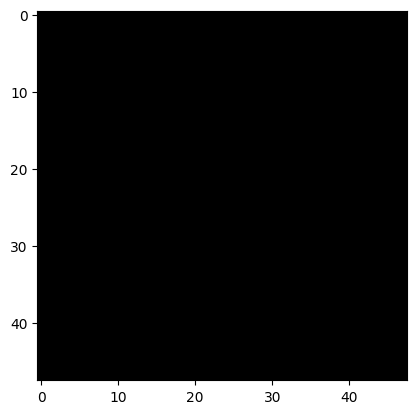

In [ ]:
image_files = os.listdir(blanked_dir)
if not image_files:
    print("No images found in the directory.")
else:
    print("Number of blanked images that has been removed is :", len(image_files))
    img_path = os.path.join(blanked_dir, image_files[0])
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(img_rgb)


From our analysis, we identified 12 images that are either completely black or white due to zero pixel variability, and these do not contribute to the dataset. It’s best to exclude these images.

The dataset is now cleaner and more reliable. With the data validated and irrelevant images removed, we can proceed to the Exploratory Data Analysis (EDA) stage

##Destribution

In this part, I will use the CSV files for the RAF-DB dataset to create the distributions.
After the EDA phase, we will use only the image directories in RAF-DB to align the processing workflow with that of the other dataset.
Let's examine the distribution of the training set in RAF-DB


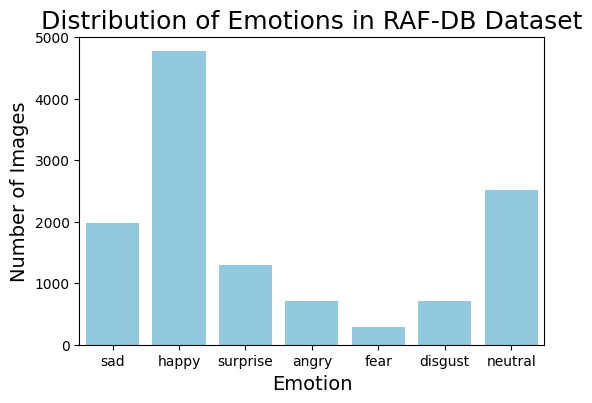

In [ ]:
raf_db_train_labels = pd.read_csv(raf_db_train_labels_path)

# Count occurrences of each emotion
train_class_counts_raf_db = raf_db_train_labels['label'].value_counts()

# Map numerical labels to emotion names for plotting
train_class_counts_raf_db.index = train_class_counts_raf_db.index.map(labels_mapping_raf_db)

raf_db_train_labels['emotion'] = raf_db_train_labels['label'].map(labels_mapping_raf_db)

# plotting
fig, ax = plt.subplots(figsize=(6, 4))
plt.title('Distribution of Emotions in RAF-DB Dataset', fontsize=18)
plt.ylabel('Number of Images', fontsize=14)
plt.xlabel('Emotion', fontsize=14)
sns.countplot(data=raf_db_train_labels,x='emotion', ax=ax, color='skyblue')
plt.show()

As we can see in this dataset, there is a significant imbalance: there are many images from the happy class and fewer images from the fear, disgust, and angry classes.
Hopefully, the other dataset we will use (FER2013) will provide more images for these underrepresented classes and help balance the distribution

Now, let's examine the distribution in FER2013. Since this dataset includes folders of images rather than CSV files, we will go through these folders and count the number of images in each class.

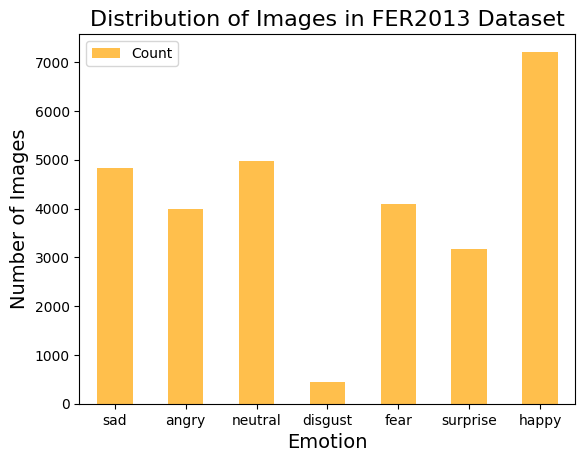

In [ ]:
#Creating dictionary with emotion classes as keys and amount of images in each class as value
train_class_counts_fer2013 = {class_label: len(os.listdir(dirs)) for class_label, dirs in train_dirs_fer2013.items()}

# Convert dictionaries to DataFrames for easier plotting
train_counts_df = pd.DataFrame.from_dict(train_class_counts_fer2013, orient='index', columns=['Count'])

#plotting
train_counts_df.plot(kind='bar', stacked=True, color='orange', alpha=0.7)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Distribution of Images in FER2013 Dataset', fontsize=16)
plt.xticks(rotation=0)
plt.show()

We can see that we have an imbalnced dataset here also, with lake of images from class disgust.
Now let's combine the graphs to explore the whole data that I chose to use in the project.

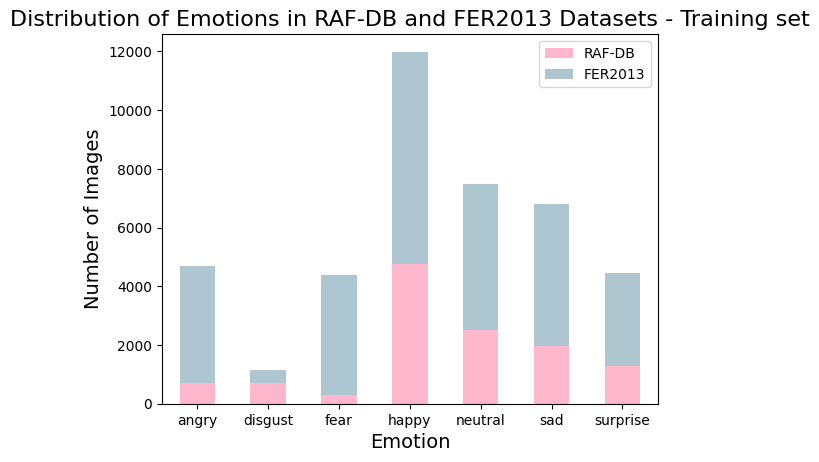

In [9]:
# Defining a function creates a bar plot comparing the counts of each emotion across both datasets.
def draw_distribution_of_both_datasets():
  train_class_counts_fer2013 = {class_label: len(os.listdir(dirs)) for class_label, dirs in train_dirs_fer2013.items()}
  train_counts_df_fer2013 = pd.DataFrame.from_dict(train_class_counts_fer2013, orient='index', columns=['Count'])

  train_class_counts_raf_db = {class_label: len(os.listdir(dirs)) for class_label, dirs in train_dirs_raf_db.items()}
  train_counts_df_raf_db = pd.DataFrame.from_dict(train_class_counts_raf_db, orient='index', columns=['Count'])

  # Combine RAF-DB and FER2013 counts into a single DataFrame
  combined_counts_train = pd.DataFrame({
      'RAF-DB': train_class_counts_raf_db,
      'FER2013': pd.Series(train_class_counts_fer2013)
  }).fillna(0)
  plt.close('all')

  combined_counts_train.plot(kind='bar', stacked=True, color=['#FFB7CE', '#AEC6CF'])
  plt.xlabel('Emotion', fontsize=14)
  plt.ylabel('Number of Images', fontsize=14)
  plt.title('Distribution of Emotions in RAF-DB and FER2013 Datasets - Training set', fontsize=16)
  plt.xticks(rotation=0)
  plt.show()


draw_distribution_of_both_datasets()

We can see that the combined datsets are extermly imbalanced. we have much more images that are under the label of 'happy' and fewer images under the label of 'disgust'.
The lake of images from class 'disgust' can cause poor performance in classifying this class and even overfitting and Models trained on imbalanced data may not generalize well to new data,
We will see what we can do about that.

Now, we’ll determine the number of grayscale and RGB images in both datasets. Understanding the image format is crucial because different models require specific input formats. Knowing whether the images are grayscale or RGB helps ensure that the data is compatible with the model’s requirements.

Number of grayscale images: 28709
Number of RGB images: 12271



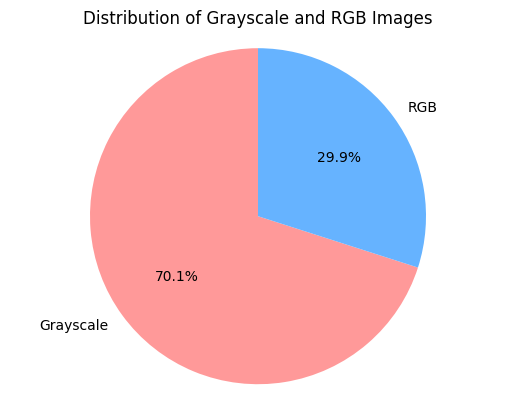

In [ ]:
# defining a function that findes whether an image is grayscaled ot not
def is_grayscale(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    if len(img.shape) < 3:
      return True
    elif img.shape[2] == 1:
        return True
    else:
        return False

directories_raf_db = list(train_dirs_raf_db.values())
directories_fer2013 = list(train_dirs_fer2013.values())

all_directories=[directories_raf_db, directories_fer2013]

num_grayscale = 0
num_rgb = 0


for directory in all_directories:
  for dir in directory:
    for filename in os.listdir(dir):
          img_path = os.path.join(dir, filename)
          if is_grayscale(img_path):
                num_grayscale += 1
          else:
                num_rgb += 1

print(f"Number of grayscale images: {num_grayscale}")
print(f"Number of RGB images: {num_rgb}\n")


plt.pie([num_grayscale, num_rgb], colors = ['#ff9999','#66b3ff'], labels=['Grayscale', 'RGB'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Grayscale and RGB Images')
plt.show()

We observe a significantly higher number of grayscale images compared to RGB ones. This composition in the combined datasets, may not accurately reflect real-world scenarios. Our Models trained mainly on grayscale images might struggle to classify RGB images, which are more representative of real-world conditions, potentially posing a challenge in practical applications.

##Image dementions
Now we will investigate the dimensions of the images in the RAF-DB dataset. We already know that FER2013 is a scaled dataset with images resized to 48x48 pixels. I want to create a scatter plot to show the width and height of the images in the RAF-DB dataset. To do this, we will define a function that returns the dimensions of a single image.

In [ ]:
def get_dimensions(file):
    img = Image.open(file)
    return img.size

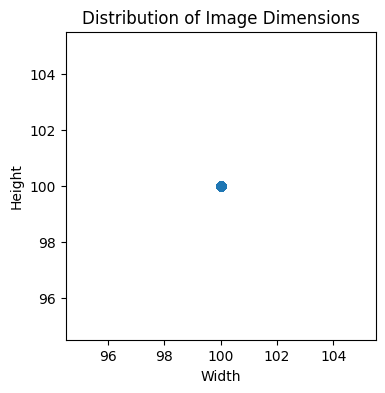


This dataset is scaled to: 100 X 100 dimentions


In [ ]:
all_fils = []
file_list=[]
path=""
is_scaled= False


for class_label, directory in train_dirs_raf_db.items():
    file_list = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    for file in file_list:
      all_fils.append({'Class': class_label, 'File': file})

df_dimensions = pd.DataFrame(all_fils)

# The results are separated into width_dim and height_dim lists

width_dim, height_dim = zip(*df_dimensions['File'].map(get_dimensions))

#An indication of whether the lists we created have different numbers in them, which would mean different dimensions.
if len(set(width_dim))==1 and len(set(height_dim))==1:
  is_scaled = True

df_dimensions['Width'], df_dimensions['Height'] = width_dim, height_dim
plt.figure(figsize=(4, 4))
plt.scatter(df_dimensions['Width'], df_dimensions['Height'],  alpha=0.5)
plt.title('Distribution of Image Dimensions')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()
if is_scaled:
  print('\nThis dataset is scaled to:',list(set(width_dim))[0],'X',list(set(height_dim))[0],'dimentions')


We can see that the data is scaled to 100x100 dimensions, otherwise, we would see more points distributed across different areas of the graph. This indicates that due to the differences between the two datasets, we will need to resize one of them to match the dimensions of the other during preprocessing. This step is necessary to ensure that the models perform as expected.


##Visualization
Let's visualize images from the datasets to see them in their original dimensions.

First, we will go through each directory in FER2013 and display one image from each category.


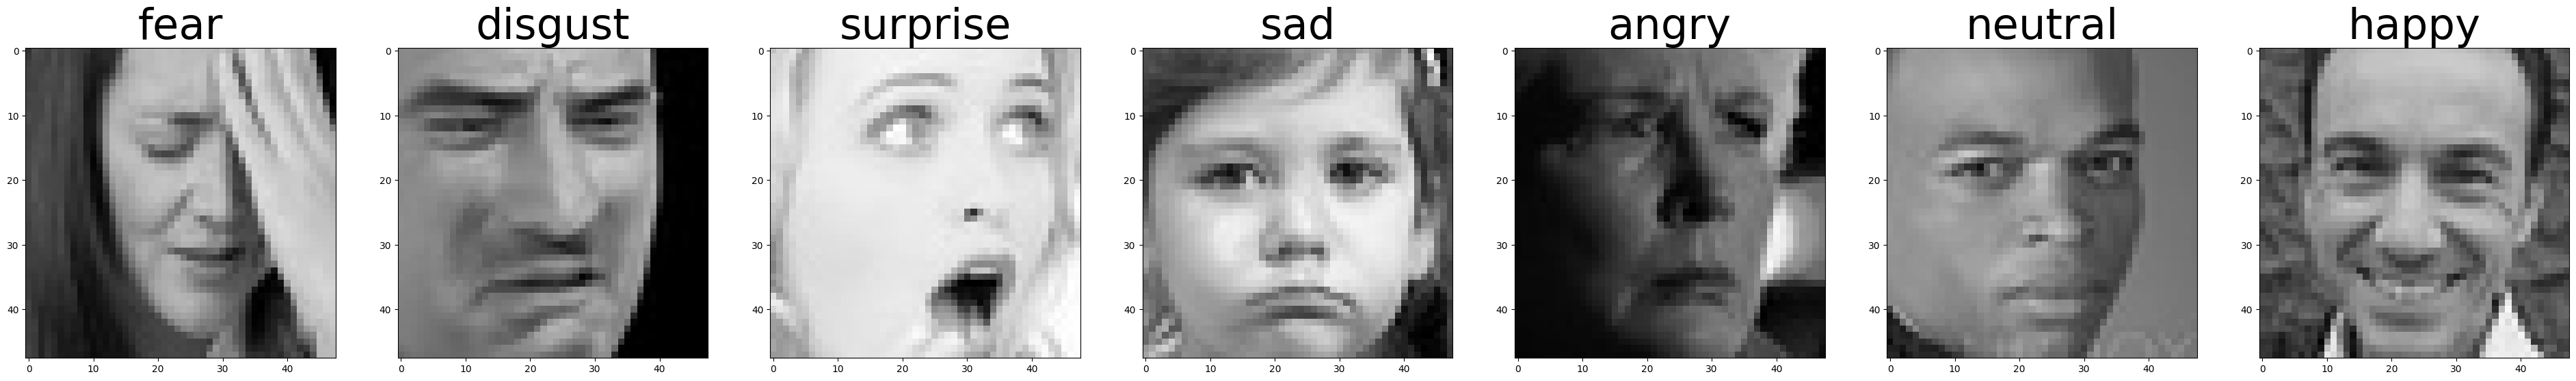

In [ ]:
plt.figure(figsize=(48,48))

for i,(emotion,path) in enumerate(train_dirs_fer2013.items(),1):
    img_path = os.path.join(path, os.listdir(path)[3])
    img = cv2.imread(img_path)
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(emotion, fontsize=45)

Here we can see that the images are indeed grayscale, as indicated in the datacard.

Now, let's examine the images in the RAF-DB dataset.

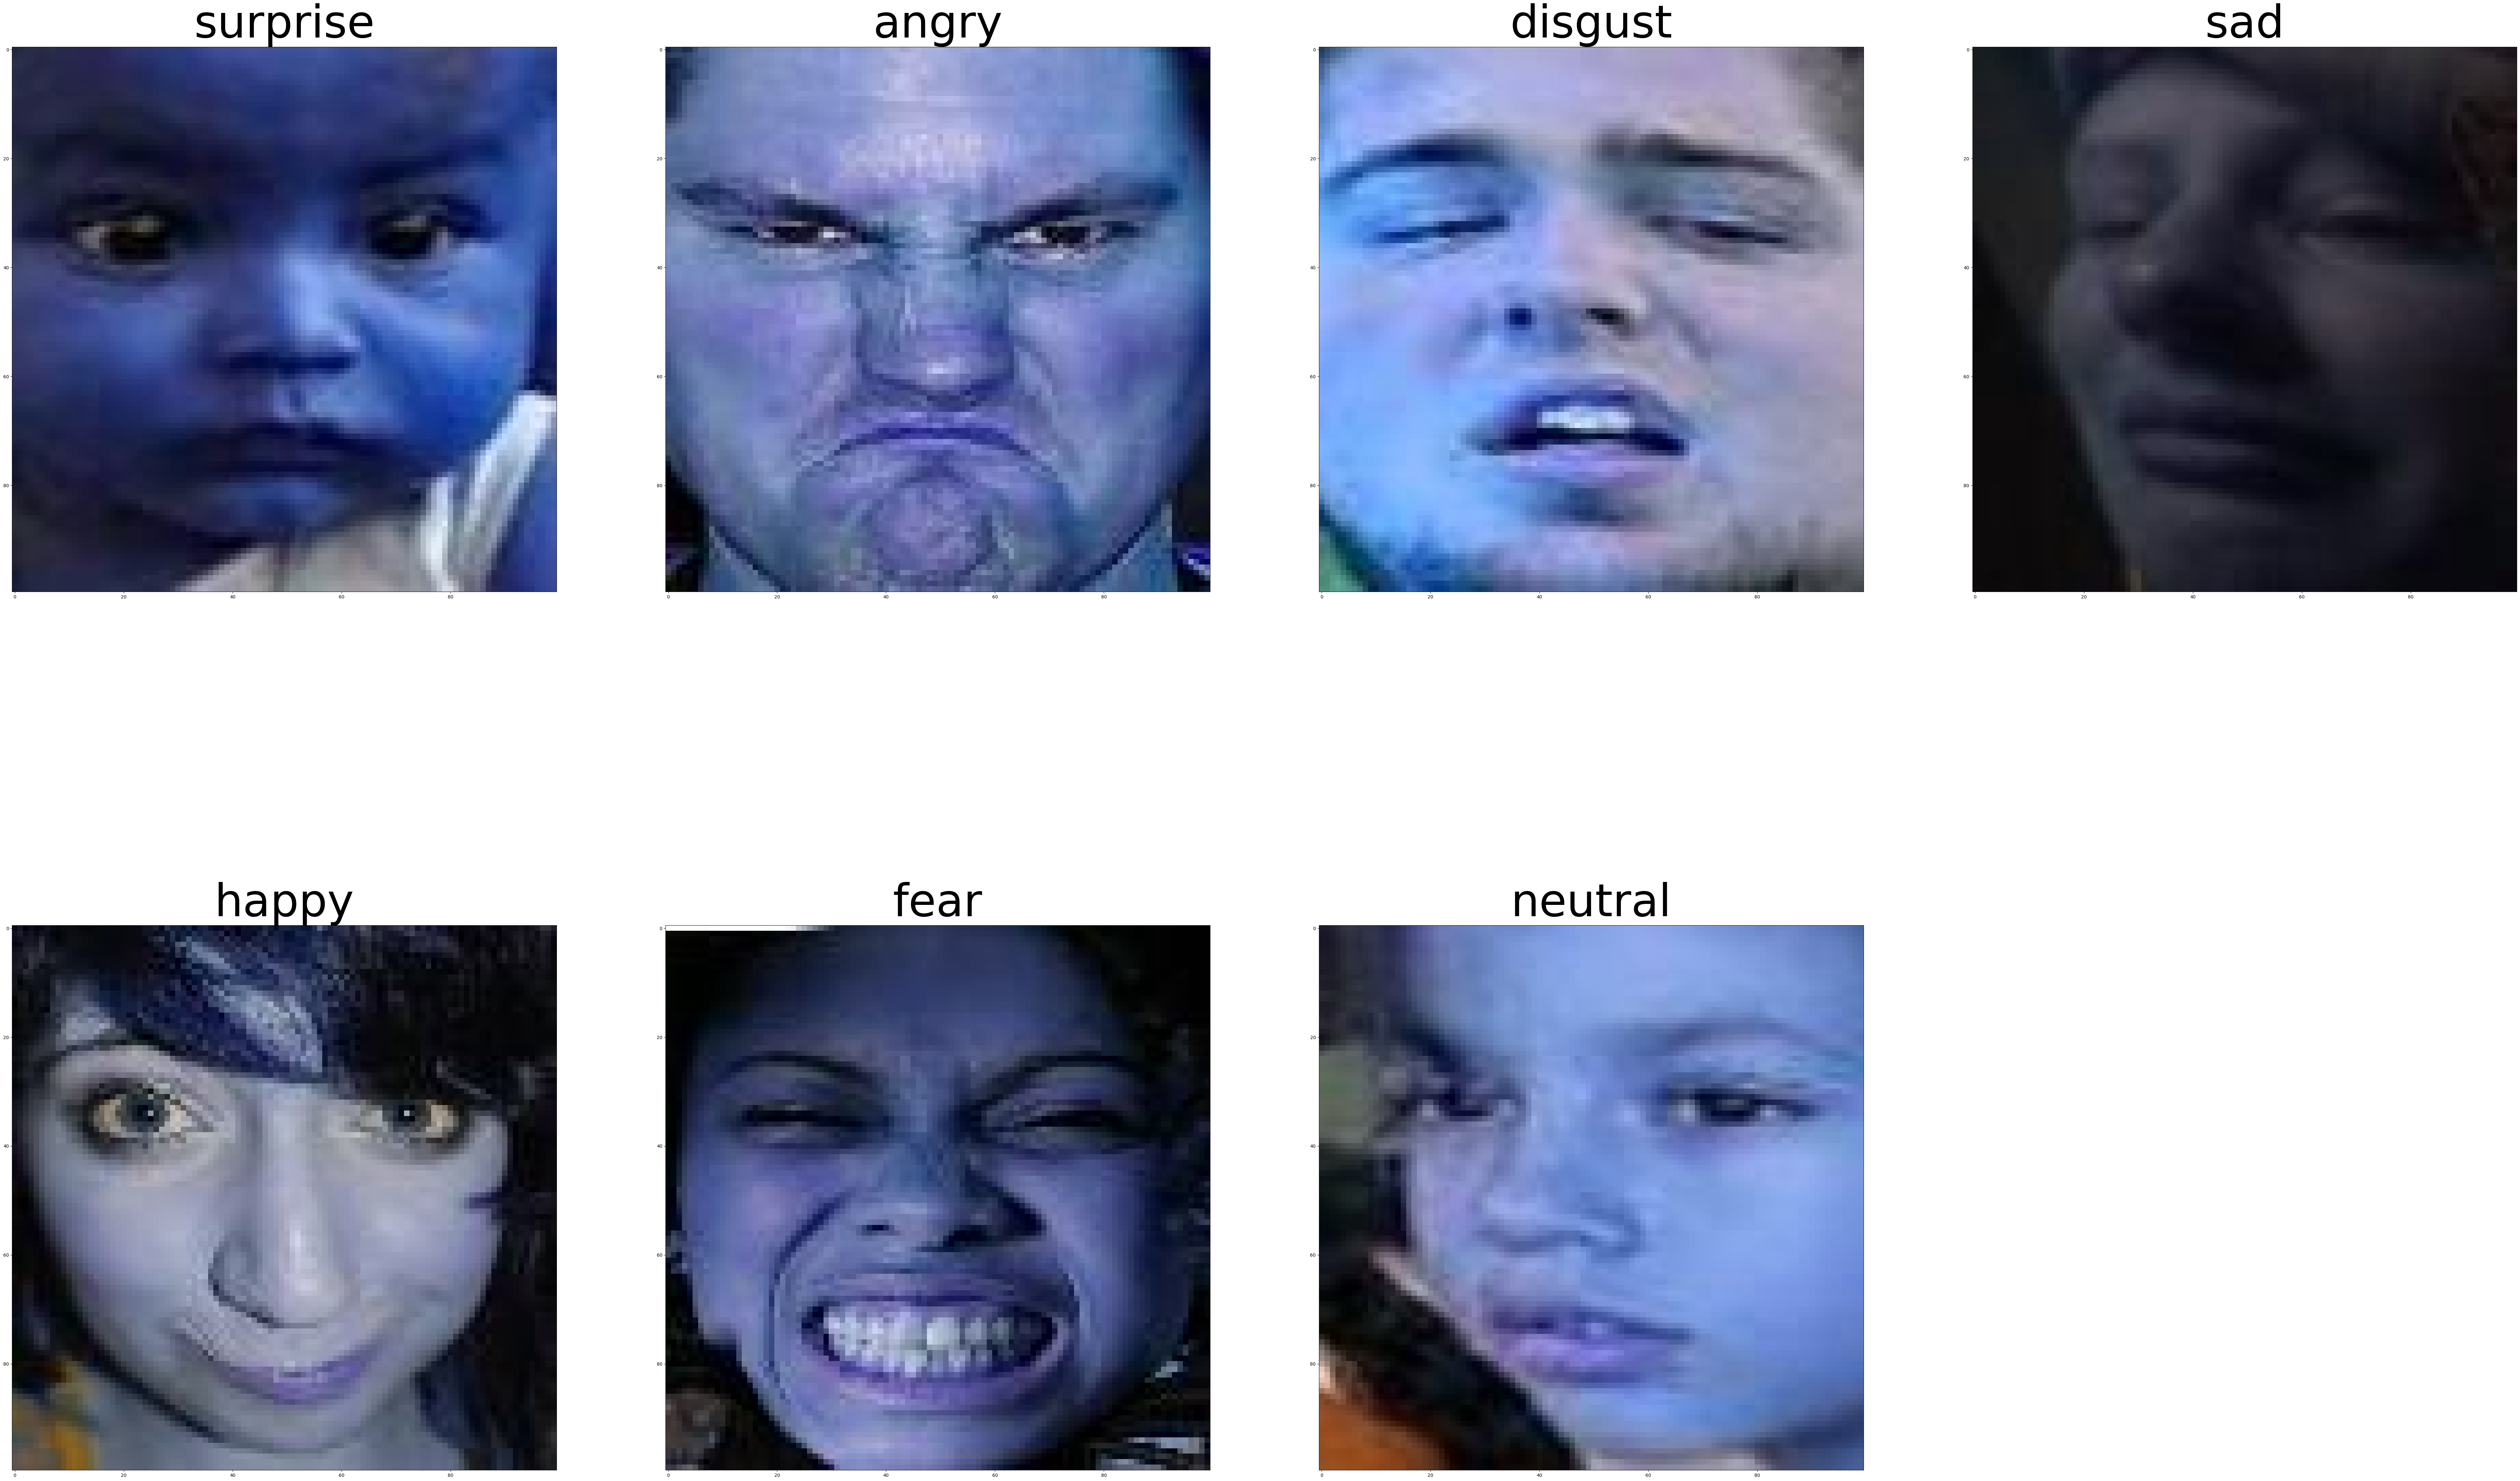

In [ ]:
plt.figure(figsize=(100,100))

for i,(emotion,path) in enumerate(train_dirs_raf_db.items(), 1):
    img_path = os.path.join(path, os.listdir(path)[1])
    img = cv2.imread(img_path)
    plt.subplot(3,4,i)
    plt.imshow(img)
    plt.title(emotion, fontsize=100)

These pictures could use a bit of a makeover, let’s fix up their colors and give them a fresh look.

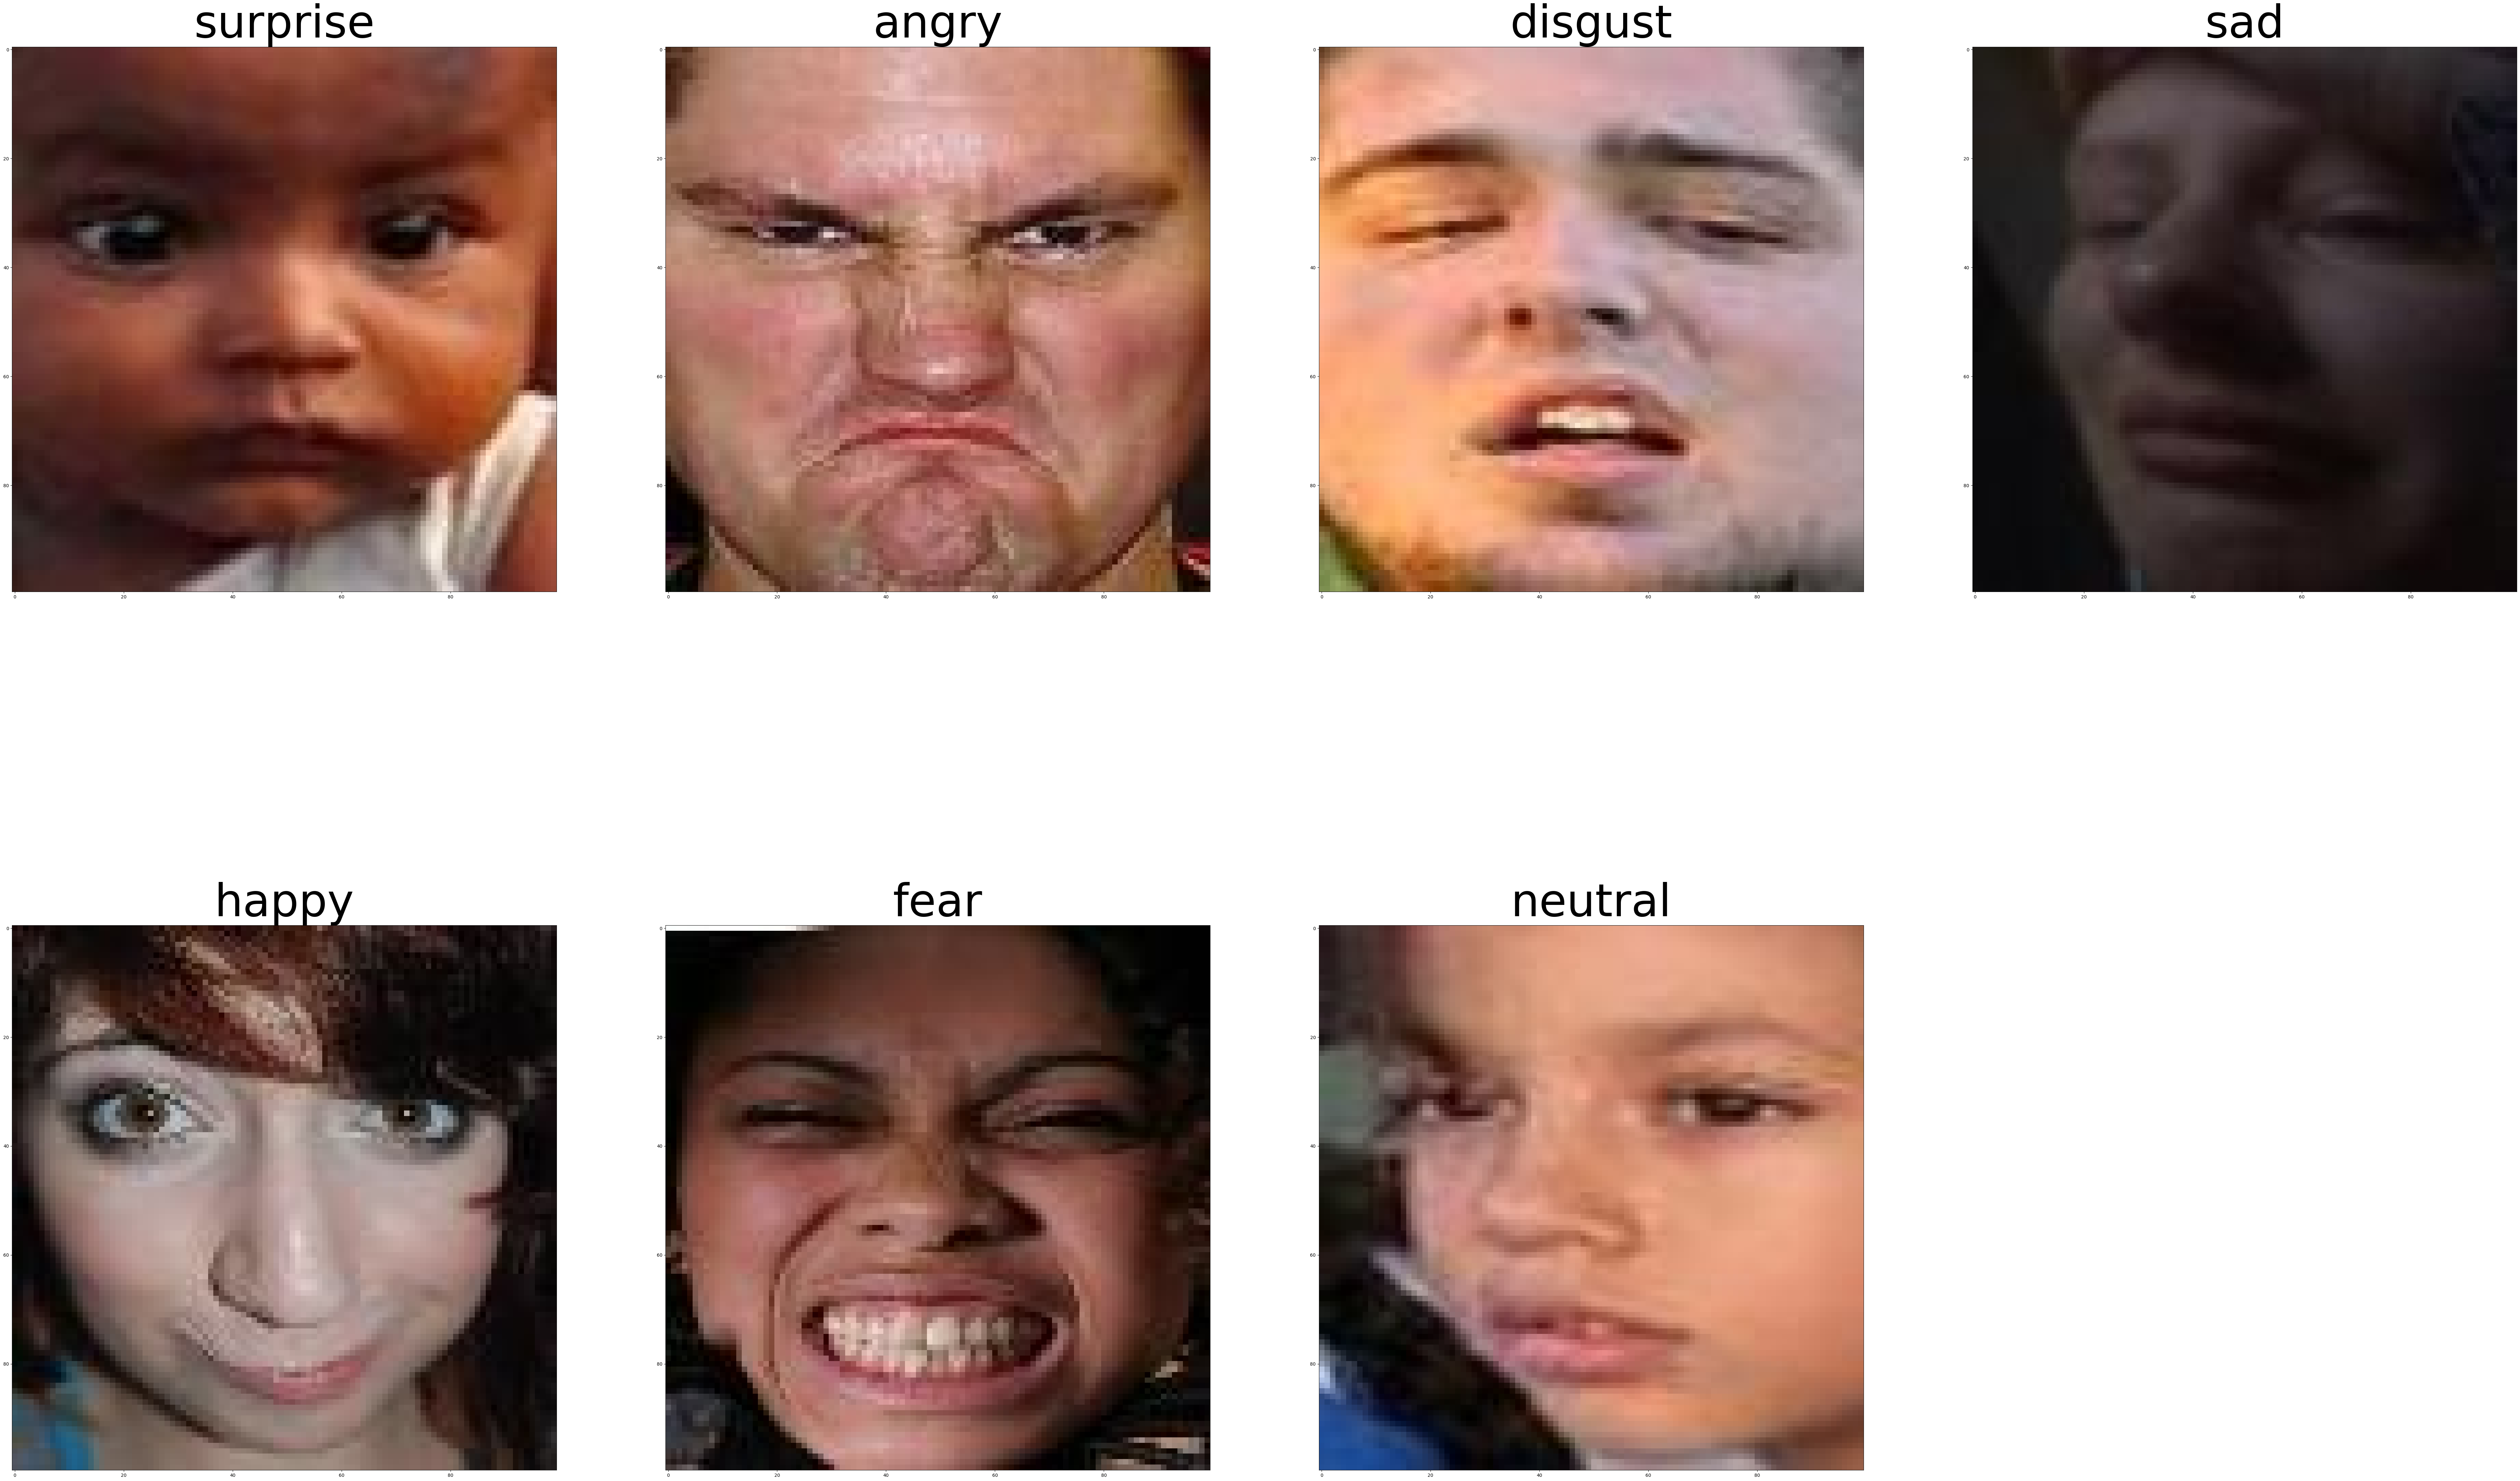

In [ ]:
plt.figure(figsize=(100,100))
for i,(emotion,path) in enumerate(train_dirs_raf_db.items(), 1):
    img_path = os.path.join(path, os.listdir(path)[1])
    img = cv2.imread(img_path)
    fixed_colors= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(3,4,i)
    plt.imshow(fixed_colors)
    plt.title(emotion, fontsize=100)

Ok that's much better.

We can see that this dataset includes colored images, which is beneficial as it adds diversity and may help the model capture details more effectively. However, both datasets do not have the most ideal resolution. While lower-resolution images reduce the amount of data to be processed, leading to faster computations and reduced processing time, this can be problematic in our case. Small details are sometimes crucial for accurately capturing emotions on people's faces.

##Histogram Analysis
Now I will explore the histogram of random images in the FER2013 dataset.

Investigating the histogram, which represents the distribution of pixel intensities in an image, is important because it helps assess image contrast, identify quality issues, and guide enhancements for better image processing.

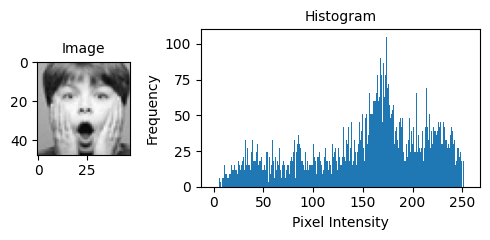

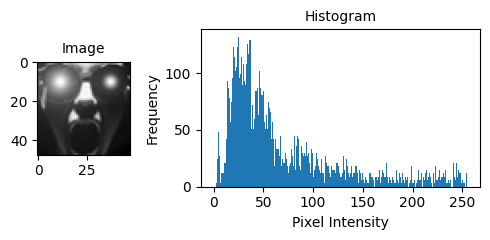

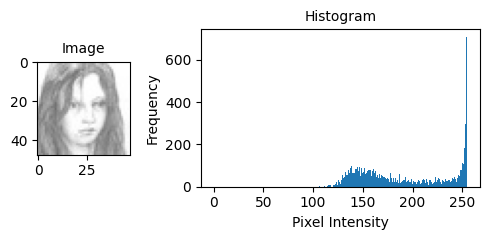

In [ ]:
random_emotions_path = random.sample(list(train_dirs_fer2013.values()), 3)
random_images=[]

#choose random images from random emotions
for emotion_path in random_emotions_path:
  specific_image = random.sample(os.listdir(emotion_path), 1)
  random_images.append(os.path.join(emotion_path, specific_image[0]))

def plot_histogram(image_path):
  img = cv2.imread(image_path)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.5), gridspec_kw={'width_ratios': [1, 3]})

  # Plot the image on the left subplot
  ax1.imshow(img, cmap='gray')
  ax1.set_title('Image', fontsize=10)

  # Plot the histogram on the right subplot
  ax2.hist(img.ravel(), bins=256, range=(0, 255))
  ax2.set_title('Histogram', fontsize=10)
  ax2.set_xlabel('Pixel Intensity')
  ax2.set_ylabel('Frequency')

  # Adjust layout and display the figure
  plt.tight_layout()
  plt.show()


for image in random_images:
  plot_histogram(image)

I ran these commands multiple times to sample more than three images per dataset, and I found out that not all of the pictures utilize the entire range of pixel intensity. This finding is significant because maximizing the use of this range enhances image detail and contrast.

For the other dataset (RAF-DB), since we plan to use colored images and not convert them to grayscale, this check is not relevant for considering whether histogram equalization techniques are needed during preprocessing

##Feature extraction

We will now perform feature extraction to better understand facial expressions by highlighting key aspects of the data. This process helps identify emotion patterns in faces by extracting important features such as edges, shapes, and textures. It also reveals which facial regions, like the eyes, mouth, and nose, carry the most significant information for emotion detection.

For instance, features like the shape of the mouth (e.g., smiling) or the position of the eyebrows can distinguish between emotions like happiness, sadness, and anger.

 By visualizing these extracted features, we can determine whether certain emotions have distinct characteristics, making classification easier.



### HOG (Histogram Of Gradients)
Now we will use **Histogram of Oriented Gradients (HOG)** which is a method used in computer vision to extract features of an image, especially for object detection.

It works by analyzing the directions in which the intensity or contrast of the image shifts, capturing the overall structure and patterns of these changes, known as gradients.

In summary, the process involves dividing the image into multiple regions (bins). For each bin, we cut the image values along the x-axis and y-axis and then calculate a histogram of gradients for that bin, which will represent our features. To understand this process, we will begin by examining how to segment the image using convolution with one of the simplest techniques, the Sobel operator.

The Sobel operator, named after _Irwin Sobel_ and _Gary M. Feldman_, detects edges by computing the gradient of image intensity. It works by convolving the image with a simple filter to approximate the gradient, emphasizing areas where intensity changes sharply.

We will select three images from our dataset to experiment with feature extraction.

In [8]:
happy= cv2.imread('/content/RAF-DB/DATASET/train/happy/train_00117_aligned.jpg')
sad = cv2.imread('/content/RAF-DB/DATASET/train/sad/train_00030_aligned.jpg')
surprise = cv2.imread('/content/RAF-DB/DATASET/train/surprise/train_01171_aligned.jpg')


we will define a function that cuts the image based on the Sobel operator as we mentioned before. that we will be able to use muliple times

In [9]:
def cut_image(image):
  img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
  gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
  return gx, gy

In [6]:
def draw_cut(img):
  gx_img, gy_img= cut_image(img)
  plt.figure(figsize=(6,6))

  plt.subplot(1,3,1)
  fixed_colors= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(fixed_colors)
  plt.axis('off')
  plt.title('Original Image')


  plt.subplot(1,3,2)
  plt.imshow(np.clip(gx_img, 0,1))
  plt.axis('off')
  plt.title('x-axis')

  plt.subplot(1,3,3)
  plt.imshow(np.clip(gy_img, 0,1))
  plt.axis('off')
  plt.title('y-axis')


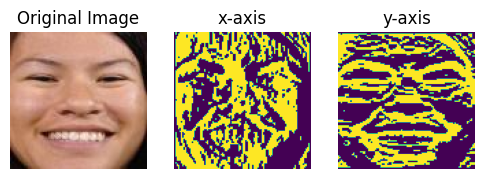

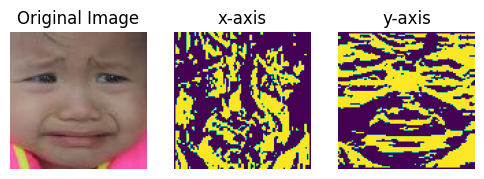

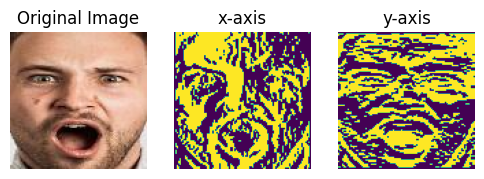

In [ ]:
draw_cut(happy)
draw_cut(sad)
draw_cut(surprise)

We can now define a function based on the Learning booklet to perform the HOG (Histogram of Oriented Gradients) process on the segmented image. This function will facilitate feature extraction, which can then be utilized for classification tasks.

We will use the `cut_image` function to calculate both the gradient magnitude and angle for each pixel in the image. Then, we will average these values over 16 bins, with each bin further divided into 4 sub-regions. For each sub-region, we will compute the gradient histogram.

In [10]:
bin_n = 16
def hog(img):
  gx, gy = cut_image(img)
  mag, ang = cv2.cartToPolar(gx, gy)
  bins = np.int32(bin_n * ang/(2*np.pi))
  bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
  mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
  hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells,
  mag_cells)]
  hist = np.hstack(hists)
  return hist

Now, we can use the data to extract HOG (Histogram of Oriented Gradients) features from each image.


In [11]:
labels_mapping_to_nums={
     'surprise': 1,
    'fear': 2,
     'disgust': 3,
    'happy':4,
     'sad':5,
     'angry':6,
     'neutral':7
}

In [12]:
train_img = []
train_labels = []
hog_features_list = []
test_img = []
test_labels = []

for dir in [raf_db_train_set_path,fer2013_train_dir]:
  for sub_dir in os.listdir(dir):
    for img in os.listdir(os.path.join(dir, sub_dir)):
      img_path = os.path.join(dir, sub_dir, img)
      image = cv2.resize(cv2.imread(img_path), (48,48))
      train_img.append(image)
      hog_features_list.append(hog(image))
      train_labels.append(labels_mapping_to_nums.get(sub_dir))

In [13]:
X_train = np.array(hog_features_list)
y_train = np.array(train_labels)

In [14]:
for dir in [raf_db_test_set_path,fer2013_test_dir]:
  for sub_dir in os.listdir(dir):
    for img in os.listdir(os.path.join(dir, sub_dir)):
      img_path = os.path.join(dir, sub_dir, img)
      image = cv2.resize(cv2.imread(img_path), (48,48))
      test_img.append(hog(image))
      test_labels.append(labels_mapping_to_nums.get(sub_dir))

In [15]:
X_test = np.array(test_img)
y_test = np.array(test_labels)

In [16]:
trainData = np.float32(X_train).reshape(-1,64)
testData = np.float32(X_test).reshape(-1,64)

In [17]:
num_classes = 7  # Number of classes
samples_per_class = len(y_test) // num_classes
remainder = len(y_test) % num_classes

responses_test = np.concatenate([
    np.repeat(np.arange(num_classes), samples_per_class),
    np.arange(remainder)
])


After thoroughly understanding how this process works, As humans, we need to visualize results for better understanding. for that cause we will use a built-in HOG function from the `skimage` library that allows us to visualize the HOG feature, the code generates images of the histograms. This code is inspired by the code provided on the [Scikit-image documentation](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html).

We will apply the visualization to the three selected images.



In [11]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

In [ ]:
def draw_hog(img):
  fd, hog_image = hog(
      img,
      orientations=8,
      pixels_per_cell=(10, 10),
      cells_per_block=(1, 1),
      visualize=True,
      channel_axis=2,
  )

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 6), sharex=True, sharey=True)

  ax1.axis('off')
  ax1.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  ax1.set_title('Input image')

  # Rescale histogram for better display
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

  ax2.axis('off')
  ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
  ax2.set_title('Histogram of Oriented Gradients')
  plt.show()

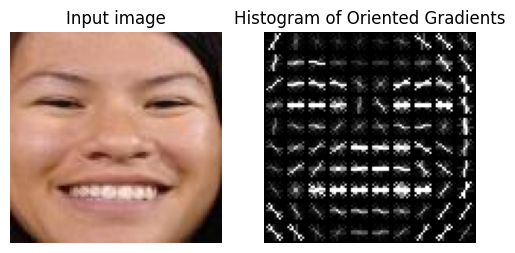

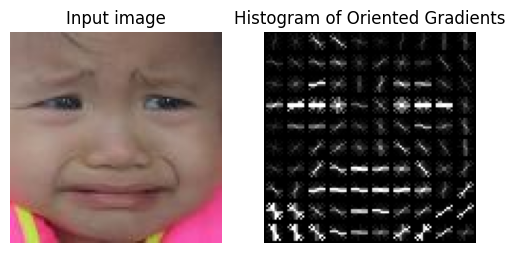

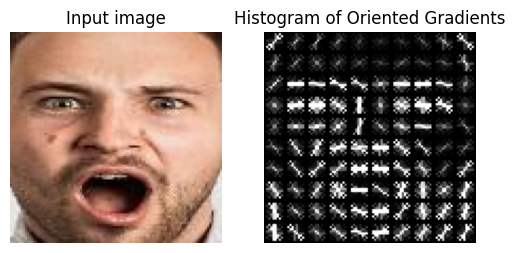

In [ ]:
draw_hog(happy)
draw_hog(sad)
draw_hog(surprise)

This technique is commonly recognized as effective for detecting human features. However, since the images are close-ups of the face, edge detection may not perform optimally in all areas. If we examine the histogram of oriented gradients (HOG) image, we observe that the gradients are indeed darker in regions like the forehead and cheeks, while they appear brighter and show more distinct angle changes around the eyebrows, nose, and mouth, where there are stronger directional shifts.

It's also important to note that these images are relatively small, with dimensions of just 100x100 pixels, which can limit the precision of the gradient representation for this task.

### SIFT
Now, we will extract features using SIFT. The scale-invariant feature transform (SIFT) is a powerful computer vision algorithm designed to detect, describe, and match distinctive local features in images. SIFT is based on finding keypoints that are invariant to scale and rotation, making it robust against changes in image scale and orientation. SIFT is beneficial for our mission because it can identify keypoints in areas like the mouth, eyes, and eyebrows, which are crucial for expressing emotions. These regions provide critical information for recognizing facial expressions, making SIFT an excellent choice for feature extraction in FER.

To achieve this, we will write a function to detect keypoints identified by SIFT and then draw them on the image. We will apply this function to three random images and explore the results.

In [ ]:
def apply_sift_and_draw(img):
  plt.figure(figsize=(5,5))
  plt.subplot(1,2,1)
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title('Original Image')


  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  sift = cv2.xfeatures2d.SIFT_create()
  kp = sift.detect(gray,None)
  cv2.drawKeypoints(gray,kp,img)

  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.axis('off')
  plt.title('Keypoints Detected')


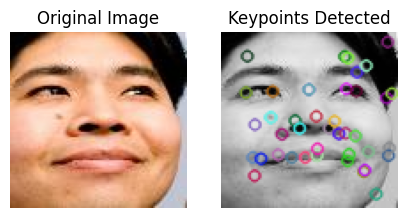

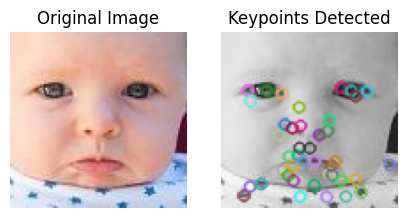

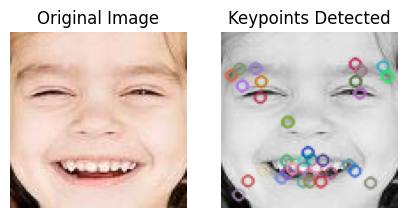

In [ ]:
img1 = cv2.imread('/content/RAF-DB/DATASET/test/happy/test_1046_aligned.jpg')
img2 = cv2.imread('/content/RAF-DB/DATASET/train/sad/train_00560_aligned.jpg')
img3 = cv2.imread('/content/RAF-DB/DATASET/train/happy/train_01348_aligned.jpg')


apply_sift_and_draw(img1)
apply_sift_and_draw(img2)
apply_sift_and_draw(img3)


The SIFT algorithm has effectively identified keypoints, primarily focusing on areas such as the mouth, nose, and eyebrows. These regions are crucial for facial emotion recognition (FER) because they contain the most relevant features for distinguishing different emotions. By concentrating on these significant areas, SIFT helps capture important details that are essential for accurately identifying emotions in facial images.

To access the 128-dimensional descriptors that represent the keypoints, we can call **`sift.compute()`** which computes the descriptors from the keypoints we have found.

#Clustering
First thing I will try to do is clustering for pixels on selected images.
An image's structure (grid) can be represented using a connectivity graph, which shows the neighboring relationships between each pixel. This connectivity graph helps define a feature space for the image by capturing the distances between pixel values and their neighbors. Essentially, an image can be represented through the Euclidean distances between pixels and their surrounding values.

I will use a clustering method called **Agglomerative Clustering**, where I will build a connectivity graph for each image. To better analyze the process and gain insights into the data, I will sample a few images as done previously.

After constructing the connectivity graph, I will fit the clustering model, then reconstruct the images from the feature array. This will allow me to explore the clustering results, draw conclusions from the data, and assess how effectively the process captures the image structure.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, cluster
import cv2
from sklearn.feature_extraction.image import grid_to_graph

To build a connectivity graph, images need to be reshaped into 1D arrays array of pixel values. For this process, it's more convenient if all images have a consistent size.
While I plan to include a preprocessing step to standardize image sizes across the dataset, for now, during the EDA stage, I will resize only the specific images I am analyzing.

In [ ]:
img1 = cv2.resize(cv2.imread('/content/RAF-DB/DATASET/train/surprise/train_00170_aligned.jpg'), (48,48))
img2 = cv2.resize(cv2.imread('/content/RAF-DB/DATASET/train/sad/train_00654_aligned.jpg'), (48,48))
img3 = cv2.resize(cv2.imread('/content/RAF-DB/DATASET/train/neutral/train_09800_aligned.jpg'), (48,48))
img4 = cv2.imread('/content/FER2013/test/happy/PrivateTest_20968183.jpg')
img5 = cv2.imread('/content/FER2013/test/happy/PrivateTest_30108404.jpg')
img6 = cv2.imread('/content/FER2013/test/happy/PrivateTest_49906218.jpg')

raw_images = [img1,img2, img3, img4, img5, img6]

In [ ]:
target_height, target_width = 48, 48

# Read and preprocess images
images_array = []
for img in raw_images:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_normalized = img_gray / 255.0
    images_array.append(img_normalized)

# Convert list to NumPy array
images = np.array(images_array)


In [ ]:
X = np.reshape(images, (len(images), -1))

In [ ]:
connectivity = grid_to_graph(*images[0].shape)
agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=32)
agglo.fit(X)

FeatureAgglomeration(connectivity=<2304x2304 sparse matrix of type '<class 'numpy.int64'>'
	with 11328 stored elements in COOrdinate format>,
                     n_clusters=32)

After fitting the clustering model on the samples, we use the transform function to reduce the dimensionality of X by grouping similar features into clusters and summarizing them. This gives us a compressed version of the data.

After compressing the data, I will use the inverse_transform function to reconstruct the images, allowing us to assess how well the data is restored from the reduced feature space. This will help us understand the quality of the compression and the effectiveness of the clustering process

In [ ]:
X_reduced = agglo.transform(X)
X_restored = agglo.inverse_transform(X_reduced)
images_restored = np.reshape(X_restored, images.shape)

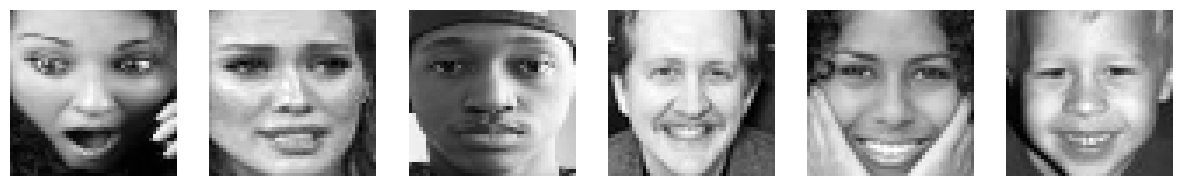

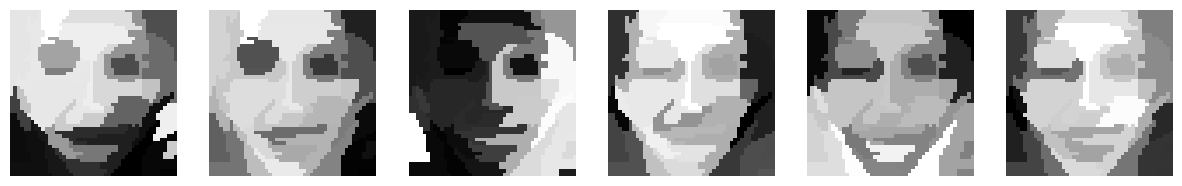

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(6):
 plt.subplot(1, 6, i+1)
 plt.imshow(cv2.cvtColor(raw_images[i], cv2.COLOR_BGR2GRAY), cmap=plt.cm.gray, interpolation='nearest')
 plt.axis('off')
plt.show()
plt.figure(figsize=(15, 15))
for i in range(6):
 plt.subplot(1, 6, i+1)
 plt.imshow(images_restored[i],cmap=plt.cm.gray, interpolation='nearest')
 plt.axis('off')
plt.show()



The clustering model has retained the core structure of the original data after dimensionality reduction. Despite the blurriness, the overall shape and main facial features remain recognizable. However, a significant amount of detail has been lost during the compression process, which is expected, as dimensionality reduction naturally simplifies the data.

Now, let's examine the classifier's labels.

Agglomerative Clustering is a type of hirearachy clustering, Let's observe the hierarchy tree of the algorithm we just fit to better understand how the clusters are formed and the relationships between different samples. This will provide insights into the clustering process.

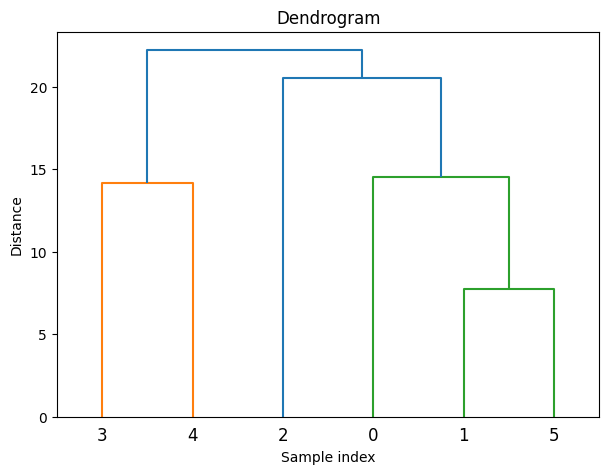

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.image import grid_to_graph
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(7,5))
dendrogram(linkage(X, 'ward') )
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

The dendrogram illustrates the evolution of clusters as we ascend the hierarchy. Early merges occur at lower distances, indicating smaller dissimilarities, while merges at higher levels reflect greater dissimilarities between clusters. This visualization helps us understand the hierarchical structure and the degree of similarity among clusters.

Specifically, since lower merge heights signify greater similarity between clusters, we observe that clusters associated with samples 1 and 5 merge at a lower height. This suggests that these samples share more common features compared to others.

Now, let’s visualize the classifier's labels.

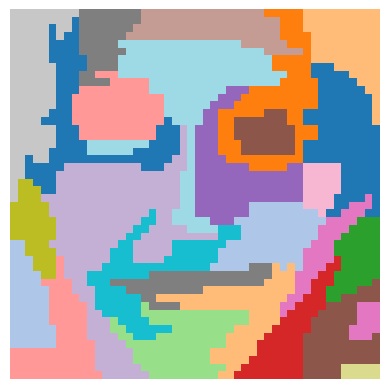

In [ ]:
plt.imshow(np.reshape(agglo.labels_, (48,48)),
interpolation='nearest', cmap='tab20')
plt.axis('off')
plt.show()

Since the labels correspond to the entire group of samples, we can see that the clusters generally align with meaningful image segments and patterns, such as different facial features.

However, it's important to remember that we only sampled a few images rather than using the entire dataset.

Since the dataset includes a variety of image qualities and orientations, and some images may be more blurry or less directly facing the camera, the clustering results might not be as effective when applied to the entire dataset.


After gaining initial insights from the sample data, we will fit the clustering algorithm on the entire dataset to determine if the patterns observed in the sample are consistent at a larger scale.

In [ ]:
images_array = []

In [ ]:
for dir in all_image_dirs:
  for sub_dir in os.listdir(dir):
    for img in os.listdir(os.path.join(dir, sub_dir)):
      img_path = os.path.join(dir, sub_dir, img)
      try:
        img1 = cv2.resize(cv2.imread(img_path), (48,48))
        img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        img_normalized = img_gray / 255.0
        images_array.append(img_normalized)

      except Exception as e:
            print(f'Issue with file {img_path}. Error: {e}')

In [ ]:
all_images = np.array(images_array)

In [ ]:
Y = np.reshape(all_images, (len(all_images), -1))

In [ ]:
connectivity = grid_to_graph(*images[0].shape)
second_agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=32)
second_agglo.fit(Y)

FeatureAgglomeration(connectivity=<2304x2304 sparse matrix of type '<class 'numpy.int64'>'
	with 11328 stored elements in COOrdinate format>,
                     n_clusters=32)

In [ ]:
X_reduced = second_agglo.transform(X)
X_restored = second_agglo.inverse_transform(X_reduced)
images_restored = np.reshape(X_restored, images.shape)

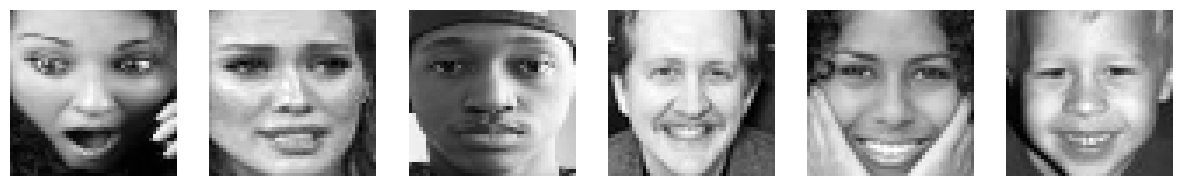

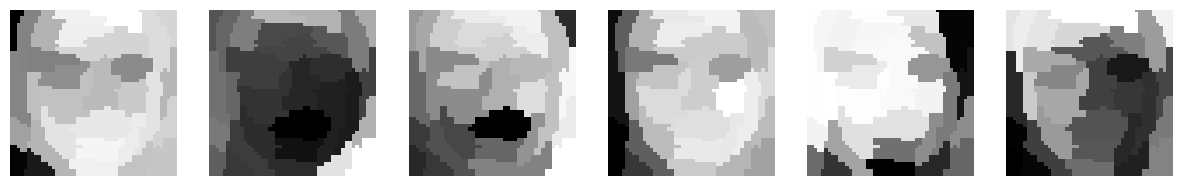

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(6):
 plt.subplot(1, 6, i+1)
 plt.imshow(cv2.cvtColor(raw_images[i], cv2.COLOR_BGR2GRAY), cmap=plt.cm.gray, interpolation='nearest')
 plt.axis('off')
plt.show()
plt.figure(figsize=(15, 15))
for i in range(6):
 plt.subplot(1, 6, i+1)
 plt.imshow(images_restored[i],cmap=plt.cm.gray, interpolation='nearest')
 plt.axis('off')
plt.show()

As we suspected, Fitting the clustering algorithm on the entire dataset showed that increased variability and complexity can make it challenging to form clear and distinct clusters. The reconstructed images, which reflect this complexity, demonstrate how data diversity impacts clustering performance. This observation helps us understand that the dataset is indeed diverse.

##EDA Conclutions
In our data observation, we found some issues that might be problematic for future stages and that we should pay attention to:
1. Our data is imbalanced (some classes have much more images than the others, and much more grayscaled images than RGB ones).
2. Each data set is scaled to different dimentions (FER2013-48X48, RAF-DB-100X100).
3. In FER2013 not all of the images utilize the entire range of pixel intensity.
4. The dataset is diverse and includes a wide range of real-world cases


#Preprocessing


I will use more preprocessing techniques across different models, but for now, I will focus on some basic preprocessing stages, which will be done right now.

##Resizing
First thing we'll do is resizing one dataset to the dimentions of the other, In order that the models we'll be able to process both of the datasets.
We have two options for resizing the images. The first option is to resize the FER2013 dataset to 100x100 pixels. This approach will consume a significant amount of computational resources and may require techniques to handle the reconstruction of missing pixels.
The second option is to resize the RAF-DB dataset to 48x48 pixels. In this approach, we might lose some details in the images that are crucial for the accuracy of the process, but the computational time will be significantly reduced.
We we'll choose for the begging the second option, if we will see that the accurary is very low we'll consider the first approch.

In [ ]:
from tqdm import tqdm
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def resize_image(image, size):
    resized_image = cv2.resize(image, size)
    return resized_image

In [ ]:
def resize_images( input_directory, output_directory, size):
      if not os.path.exists(output_directory):
        os.makedirs(output_directory)

      for filename in tqdm(os.listdir(input_directory)):
          image_path = os.path.join(input_directory, filename)
          image = cv2.imread(image_path)
          processed_image = resize_image(image, (48,48))
          output_path = os.path.join(output_directory, filename)
          cv2.imwrite(output_path, processed_image)

for (dir_name, input_directory)  in train_dirs_raf_db.items():
  output_directory = '/content/RAF-DB/processed/train/'+dir_name
  resize_images(input_directory, output_directory, size=(48, 48))

for (dir_name, input_directory)  in test_dirs_raf_db.items():
  output_directory = '/content/RAF-DB/processed/test/'+dir_name
  resize_images(input_directory, output_directory, size=(48, 48))

100%|██████████| 162/162 [00:00<00:00, 3470.49it/s]


In [ ]:
#update the new dirs
raf_train_dir = '/content/RAF-DB/processed/train'
raf_test_dir = '/content/RAF-DB/processed/test'

#First Model - SGDClassifier using HOG extracted features

The first model will use the features we previously extracted with HOG (Histogram of Oriented Gradients) and pass them to the SGDClassifier (Stochastic Gradient Descent Classifier). From what I've read, the SGDClassifier is effective for large datasets and high-dimensional features because it updates model parameters iteratively by calculating gradients from the data. This approach speeds up training and efficiently handles large datasets. I also read that The classifier performs particularly well when combined with feature extraction methods like HOG, so we will use it for our model.

In [77]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score


Here we will define the model with `max_iter` param to ensure that the algorithm does not run indefinitely and then we will fit it with the data we prepared ealier.  

Additionally, we will use a pipeline that first applies StandardScaler as described in the Scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html). This scaling ensures that all features are on the same scale, preventing any single feature from dominating the gradient calculations and improving the model's training effectiveness.

In [74]:
sgd = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=100000, tol=1e-3))

We will use the classifier to make predictions on the test set we prepared earlier and then evaluate its performance.

In [75]:
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 27.34%


In [80]:
# Modified for improved clarity and better readability, based on previous checks and the number of samples in the support column
target_names = ['surprised','fear','disgust','happy','sad','angry','neutral']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   surprised       0.17      0.09      0.12      1160
        fear       0.20      0.20      0.20      1098
     disgust       0.03      0.01      0.01       271
       happy       0.37      0.59      0.45      2959
         sad       0.20      0.15      0.17      1725
       angry       0.15      0.13      0.14      1120
     neutral       0.23      0.16      0.19      1913

    accuracy                           0.27     10246
   macro avg       0.19      0.19      0.18     10246
weighted avg       0.24      0.27      0.25     10246



**Precision** measures the proportion of correctly predicted positive instances out of all instances predicted as positive. Essentially, it reflects how accurate the model's positive predictions are. The classification report indicates that the model performs best on the "happy" class, showing relatively higher precision compared to other classes. However, the performance for "happy" is still below expectations.

**Recall** reflects the model's ability to identify all relevant positive instances- high recall means fewer false negatives. The model struggles significantly with other classes like "disgust," which have very low precision and recall.

Overall, the model's accuracy of 27% reflects relatively poor performance across all classes.

We will visualize the learning curve of the model to gain insights into why it performed poorly on the extracted features.

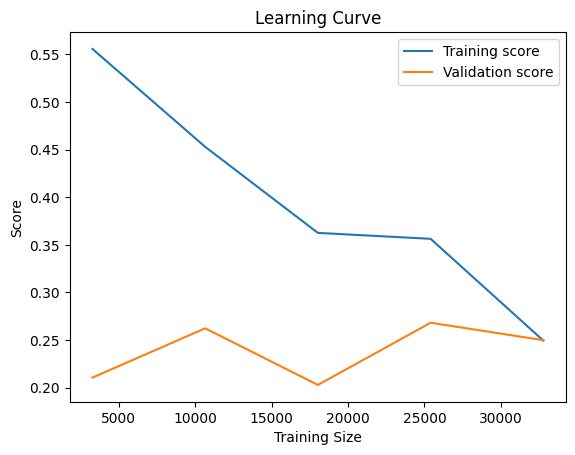

In [88]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(sgd, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation score')
plt.xlabel('Data Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

The consistently decreasing training score suggests that the model may be underfitting, meaning it is not effectively learning the patterns in the training data. This could be due to an overly simple model or features that do not provide sufficient information.

Meanwhile, the validation score shows an initial slight increase followed by a decline and then a small rise, but it remains low. This pattern indicates that the model struggles to generalize well to new data and showing inconsistent.

Let's examin different model.

#Second Model- decision tree classifier
In my second model, I will use a decision tree classifier, which is a supervised learning algorithm. First, I will run the classifier with a maximum depth of 15 and observe the results.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_blobs
from sklearn.utils.class_weight import compute_class_weight

I will now define a function to process a dataset from each directory into two lists: one containing the flattened image data (formatted for model input) and the other containing the corresponding labels.

After defining the function, I will apply it to each directory.

In [ ]:
def load_data(directory, size=(48, 48)):
    images = []
    labels = []
    for emotion in os.listdir(directory):
        emotion_dir = os.path.join(directory, emotion)
        if not os.path.isdir(emotion_dir):
            continue
        for filename in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, filename)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append(image.flatten())
                labels.append(emotion)
    return images, labels

In [ ]:
# Loading the data from each directory
X_train_fer, y_train_fer = load_data(fer2013_train_dir)
X_test_fer, y_test_fer = load_data(fer2013_test_dir)
X_train_raf, y_train_raf = load_data(raf_train_dir)
X_test_raf, y_test_raf = load_data(raf_test_dir)

In [ ]:
#combining the training datasets
X_train_combined = X_train_fer + X_train_raf
y_train_combined = y_train_fer + y_train_raf

Now we will define and train the classifier.

In [ ]:
# Initialize and train the model
model = DecisionTreeClassifier(random_state=0,max_depth=15)
model.fit(X_train_combined, y_train_combined)

DecisionTreeClassifier(max_depth=15, random_state=0)

In [ ]:
# Combining testing datasets
X_test_combined = X_test_fer + X_test_raf
y_test_combined = y_test_fer + y_test_raf

# Predict and evaluate
y_pred_combined = model.predict(X_test_combined)
accuracy_test = accuracy_score(y_test_combined, y_pred_combined)
print("Accuracy on Combined test:", accuracy_test)

Accuracy on Combined test: 0.34579348038258834


It seems that the performance of the classifier is quite low. I want to take a step back and observe the process before pruning the tree (by limiting the depth to 15).To do this, I will visualize the construction of the tree by gradually increasing the depth in increments of 5 and computing its accuracy each time.

fitting decision tree in max depth: 5
fitting decision tree in max depth: 10
fitting decision tree in max depth: 15
fitting decision tree in max depth: 20
fitting decision tree in max depth: 25
fitting decision tree in max depth: 30
fitting decision tree in max depth: 35
fitting decision tree in max depth: 40
fitting decision tree in max depth: 45
fitting decision tree in max depth: 50
fitting decision tree in max depth: 55


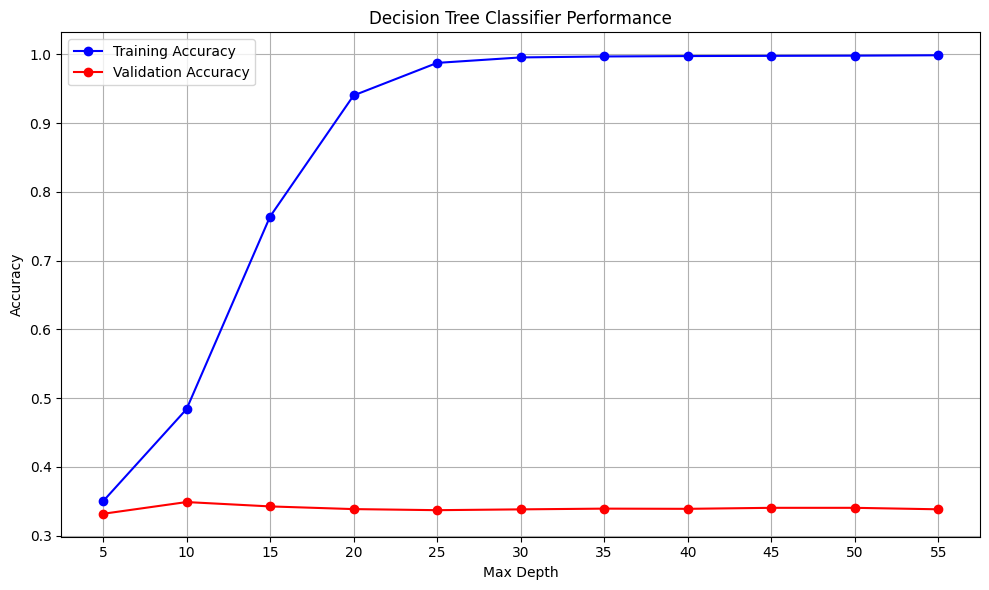

In [ ]:
max_depth_values =[5,10,15,20,25,30,35,40,45,50,55]
train_scores = []
val_scores = []
for max_depth in max_depth_values:
    print(f'fitting decision tree in max depth:', max_depth)
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    model.fit(X_train_combined, y_train_combined)

    train_score = model.score(X_train_combined, y_train_combined)
    train_scores.append(train_score)

    val_score = model.score(X_test_combined, y_test_combined)
    val_scores.append(val_score)

# Plotting the training and validation scores against model complexity
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(max_depth_values, val_scores, marker='o', label='Validation Accuracy', color='red')
plt.title('Decision Tree Classifier Performance')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the graph, it is evident that at a depth of 25, the decision tree achieves near-perfect classification on the training dataset, which might suggest overfitting. To address this, we will limit the depth of the decision tree to 22. Additionally, we will balance the class instances by assigning proportional weights to improve the results.

In [ ]:
#Calculate the weights in order to adress the imbalanced dataset
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_combined), y=y_train_combined)
class_weights_dict = {emotion: weight for emotion, weight in zip(np.unique(y_train_combined), class_weights)}

In [ ]:
model = DecisionTreeClassifier(random_state=0,max_depth=22, class_weight=class_weights_dict)
model.fit(X_train_combined, y_train_combined)

DecisionTreeClassifier(class_weight={'angry': 1.2455927051671734,
                                     'disgust': 5.077437740056994,
                                     'fear': 1.3372055080597793,
                                     'happy': 0.4883862279374084,
                                     'neutral': 0.7817179482288309,
                                     'sad': 0.8594077678047144,
                                     'surprise': 1.3123258718416755},
                       max_depth=22, random_state=0)

In [ ]:
y_pred_combined = model.predict(X_test_combined)
accuracy_test = accuracy_score(y_test_combined, y_pred_combined)
print("Accuracy on Combined test:", accuracy_test)
print(classification_report(y_test_combined, y_pred_combined))

Accuracy on Combined test: 0.314854577396057
              precision    recall  f1-score   support

       angry       0.19      0.20      0.20      1120
     disgust       0.14      0.18      0.16       271
        fear       0.23      0.24      0.23      1098
       happy       0.45      0.44      0.44      2959
     neutral       0.29      0.27      0.28      1913
         sad       0.25      0.25      0.25      1725
    surprise       0.38      0.39      0.38      1160

    accuracy                           0.31     10246
   macro avg       0.27      0.28      0.28     10246
weighted avg       0.32      0.31      0.32     10246



We can see that our accuracy is still quite low, despite our efforts to prune the tree and balance the classes for better accuracy and to prevent overfitting.
As well as the recall and the precision,
Let's try using the RandomForestClassifier to see if it helps address the overfitting issue.

#Third Model- Random Forest Classifier

In this model, I will build a RandomForestClassifier, which is an ensemble learning method that combines multiple decision trees to improve classification performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X_test_combined = X_test_fer + X_test_raf
y_test_combined = y_test_fer + y_test_raf

Now I will define and train the classifier.

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

random_forest_classifier.fit(X_train_combined, y_train_combined)
y_pred = random_forest_classifier.predict(X_test_combined)
# Calculate accuracy
accuracy = accuracy_score(y_test_combined, y_pred)
print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 0.42680070271325393


I will define a function to draw a confusion matrix, which will help us observe the accuracy of the classifier for each emotion class.

In [ ]:
from sklearn.metrics import confusion_matrix
def draw_confusion_matrix(y_test_combined,y_pred):
  plt.figure(figsize=(4, 4))
  class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
  sns.heatmap(confusion_matrix(y_test_combined, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

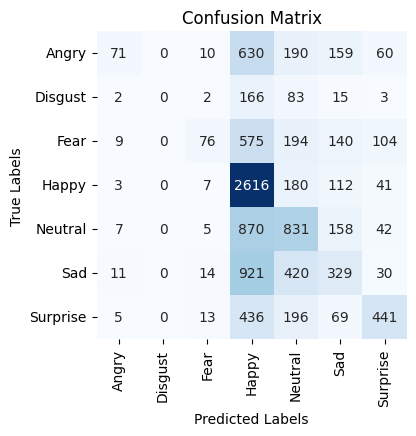

In [ ]:
draw_confusion_matrix(y_test_combined,y_pred)

We can tell that the accuracy has improved slightly, but it's still not quite satisfactory.


We can see that almost everyone appears happy, but as we know from both the real world and our dataset, this isn't quite the true picture.

Now I want to also try using the class_weight parameter because it performed poorly overall, particularly with the 'disgust' class where it failed to label any instances.

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, class_weight=class_weights_dict)

random_forest_classifier.fit(X_train_combined, y_train_combined)
y_pred = random_forest_classifier.predict(X_test_combined)

accuracy = accuracy_score(y_test_combined, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.3756587936755807


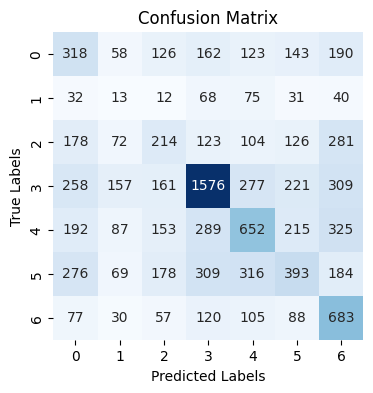

In [ ]:
draw_confusion_matrix(y_test_combined,y_pred)

Although this approach improved the classification of less frequently appearing classes like 'Disgust' and 'Surprise,' it significantly reduced the accuracy of classifying instances as 'Happy,' as well as the overall accuracy.

The results with these classifiers were not particularly successful. Let's now explore a well-known architecture in the field of facial emotion recognition: Convolutional Neural Networks (CNNs).

#Data Augmentation and Dataset Balancing

Before implementing the CNN models, I want to balance the dataset by applying data augmentation to the 'disgust' class and undersampling the 'happy' class.

First, we will focus on the 'disgust' class. I will use ImageDataGenerator to generate augmented images specifically for this class and save them to a designated directory, replacing the existing data with the augmented images.

I chose this approach to ensure that data augmentation is applied to a specific directory, which makes it easier to manage and organize the data according to my needs. While ImageDataGenerator can augment data with various parameters, it does not facilitate augmenting data within specific directories directly, which is why I am preprocessing the data this way.

In [8]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import matplotlib.image as mpimg
import shutil

Before augmenting the directory, I will first visualize how the augmented images will look using simple augmentation techniques such as rotation, flipping, zooming, and brightness adjustment. I will generate and save examples of these augmentations in a separate directory, which I will delete afterward.

In [9]:
save_aug_dir_fer2013 = '/content/FER2013/agumented_images'
save_aug_dir_raf_db = '/content/RAF-DB/agumented_images'

# Make directories for saving augmented images
disgust_save_dir_fer2013 = os.path.join(save_aug_dir_fer2013, 'disgust')
disgust_save_dir_raf_db = os.path.join(save_aug_dir_raf_db, 'disgust')

aug_img = '/content/aug_img'

# happy_save_dir = os.path.join(save_aug_dir, 'happy')
os.makedirs(aug_img, exist_ok=True)
os.makedirs(disgust_save_dir_fer2013, exist_ok=True)
os.makedirs(disgust_save_dir_raf_db, exist_ok=True)
# os.makedirs(happy_save_dir, exist_ok=True)

In [10]:
# Augmentation process
datagen = ImageDataGenerator(
        rotation_range = 40,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

I will define a function that augments each image five times, where each augmented image is a variation created by combining different augmentation parameters.

In [11]:
def augmented_images(img_arr,dest_dir,origin_dir):
  i = 0
  for batch in datagen.flow(
      img_arr,
      batch_size=1,
      save_to_dir=dest_dir,
      save_prefix='Augmented_image'+origin_dir):
      i += 1
      if i > 4: # create 5 augmented images
          break

In [13]:
img_arr = img_to_array(cv2.imread('/content/FER2013/test/angry/PrivateTest_28463343.jpg'))
img_arr = img_arr.reshape((1,) + img_arr.shape)

augmented_images(img_arr, aug_img,'_fer2013')

Now let's visualize the images we created.

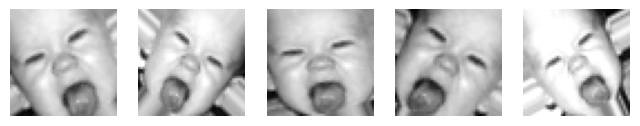

In [14]:
plt.figure(figsize=(8,8))

for i, img_path in enumerate(os.listdir(aug_img),1):
    img = cv2.imread(os.path.join(aug_img, img_path))
    plt.subplot(1,5,i)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Looks nice! Now that we've seen an example of how it works with the data, we'll implement the augmentation for the 'Disgust' class and save it in a new directory for further processing.

In [15]:
for img_path in os.listdir(train_dirs_fer2013['disgust']):
  img_arr = img_to_array(cv2.imread(os.path.join(train_dirs_fer2013['disgust'],img_path)))
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  augmented_images(img_arr,disgust_save_dir_fer2013, '_fer2013')

for img_path in os.listdir(train_dirs_raf_db['disgust']):
  img_arr = img_to_array(cv2.imread(os.path.join(train_dirs_raf_db['disgust'],img_path)))
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  augmented_images(img_arr, disgust_save_dir_raf_db,'_raf_db')


In [ ]:
shutil.rmtree('/content/aug_img')

After creating the two new augmented directories, I want to remove the unnecessary directories and replace them with the new ones.

In [16]:
 shutil.rmtree(train_dirs_fer2013['disgust'])
 shutil.rmtree(train_dirs_raf_db['disgust'])


In [17]:
shutil.move(disgust_save_dir_fer2013, fer2013_train_dir)
shutil.move(disgust_save_dir_raf_db, raf_db_train_set_path)

'/content/RAF-DB/DATASET/train/disgust'

Great! Now that we have a new directory with augmented data, we will address the number of images in the 'happy' class by undersampling it. I would like the 'happy' class to have the same number of images as the 'neutral' class, since the 'neutral' class is the largest class after 'happy'. First, we will perform some calculations to determine the required number of images. Then, I'll define a function to handle the undersampling.

In [18]:
#calculating the ratio between the classes in both datasets
ratio_fer2013 = len(os.listdir(train_dirs_fer2013['neutral']))/len(os.listdir(train_dirs_fer2013['happy']))
ratio_raf_db = len(os.listdir(train_dirs_raf_db['neutral']))/len(os.listdir(train_dirs_raf_db['happy']))

In [19]:
def undersample(source_dir, target_ratio):
    files = os.listdir(source_dir)
    num_to_move =len(files)-int(len(files) * target_ratio)
    files_to_move = random.sample(files, num_to_move)
    for file in files_to_move:
      src = os.path.join(source_dir, file)
      os.remove(src)

In [20]:
undersample(train_dirs_fer2013['happy'], target_ratio=ratio_fer2013)
undersample(train_dirs_raf_db['happy'], target_ratio=ratio_raf_db)

Now let's visualize the datasets after the balancing process i've made

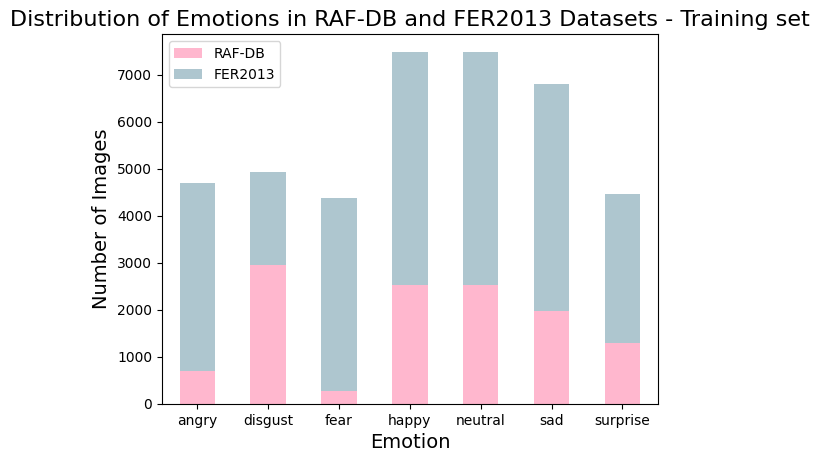

In [22]:
draw_distribution_of_both_datasets()

It's not perfectly balanced, but it's much better than what we had before. If we'll observe low performance, we will consider making additional adjustments.

Now that the data is almost ready, I want to combine the datasets into one unified directory for easier access.

In [32]:
def combine_datasets(source_dirs, target_dir):
    for source_dir in source_dirs:
        for root, dirs, files in os.walk(source_dir):
            for file in files:
                # Constructing the source and target file paths
                source_file = os.path.join(root, file)
                target_file = os.path.join(target_dir, os.path.relpath(source_file, source_dir))
                # Create directory if it doesn't exist
                os.makedirs(os.path.dirname(target_file), exist_ok=True)
                # Copy the file
                shutil.copyfile(source_file, target_file)


source_dirs = ['/content/FER2013', '/content/RAF-DB/DATASET']
target_dir = '/content/combined-datasets'

combine_datasets(source_dirs, target_dir)

That was quite a Sisyphean task, but now that the data is perfectly ready to use, let’s hope it was worth the effort!

#Forth Model- CNN

For the first CNN model, I will take inspiration from an [article](https://ir.vignan.ac.in/id/eprint/642/1/4.Dr.NVN%20FERNet.pdf) I read where the CNN architecture is organized into blocks, with each block containing several layers, including Conv2D, BatchNormalization, MaxPooling2D, and Dropout. BatchNormalization will help stabilize and accelerate training by normalizing the inputs to each layer, while Dropout reduces overfitting by randomly dropping neurons out of the network during training, which forces the remaining neurons to learn more robust features.
I used the Adam optimizer because it adapts the learning rate for each parameter, which improves convergence speed and efficiency


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

Let's see the summary of the CNN that was built.

In [4]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 21, 21, 64)        2

Now I will proceed to the training process. I will use ImageDataGenerator since I find it user-friendly. The input to the model will be 48x48 images, which will be rescaled to the [0,1] range to normalize the pixel values for making it easier for neural networks model to learn.

 The model will receive input images with 3 channels (RGB), I will address the issue of images with fewer channels by using the parameter `color_mode='rgb'`.

 The images will be fed to the model in batches of 32 images per batch. Additionally, I will split the training dataset into training and validation sets to monitor the model's performance and try to avoid overfitting. To further prevent overfitting and ensure the model generalizes well, I will use EarlyStopping with the parameters `monitor='val_loss'`, `patience=10`, and `restore_best_weights=True`. This setup will stop training if the validation loss does not improve for 10 consecutive epochs and restore the model weights from the epoch with the best validation loss.

In [5]:
NUM_CLASSES = 7
IMAGE_WIDTH, IMAGE_HEIGHT = 48, 48
BATCH_SIZE = 32

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

In [7]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_dir = '/content/combined-datasets/train'
test_dir = '/content/combined-datasets/test'
training_data_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size= BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    subset='training')


Found 32226 images belonging to 7 classes.


In [8]:
validation_data_generator  = data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation')

Found 8053 images belonging to 7 classes.


In [42]:
test_data_generator  = data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical')

Found 10246 images belonging to 7 classes.


In [ ]:
history = model.fit(
    training_data_generator,
    epochs=50,
    validation_data=validation_data_generator,
    callbacks=[early_stopping]
)

Epoch 1/50
1009/1009 [==============================] - 25s 17ms/step - loss: 1.7111 - accuracy: 0.3677 - val_loss: 1.5563 - val_accuracy: 0.4122
Epoch 2/50
1009/1009 [==============================] - 16s 16ms/step - loss: 1.3501 - accuracy: 0.4883 - val_loss: 1.4501 - val_accuracy: 0.4578
Epoch 3/50
1009/1009 [==============================] - 16s 16ms/step - loss: 1.2478 - accuracy: 0.5261 - val_loss: 1.2981 - val_accuracy: 0.5150
Epoch 4/50
1009/1009 [==============================] - 16s 16ms/step - loss: 1.1909 - accuracy: 0.5477 - val_loss: 1.5862 - val_accuracy: 0.4511
Epoch 5/50
1009/1009 [==============================] - 16s 16ms/step - loss: 1.1523 - accuracy: 0.5634 - val_loss: 1.3623 - val_accuracy: 0.4958
Epoch 6/50
1009/1009 [==============================] - 16s 16ms/step - loss: 1.1192 - accuracy: 0.5782 - val_loss: 1.3744 - val_accuracy: 0.4924
Epoch 7/50
1009/1009 [==============================] - 16s 16ms/step - loss: 1.0922 - accuracy: 0.5882 - val_loss: 1.3220 -

I will save it to Google Drive for further processing in case the runtime ends.

In [10]:
# from google.colab import drive
# import json

# drive.mount('/content/drive')
# history_dict = history.history
# history_path = '/content/drive/My Drive/history_cnn_model.json'
# with open(history_path, 'w') as f:
#     json.dump(history_dict, f)

# model_path = '/content/drive/My Drive/cnn_model.h5'
# model.save(model_path)

In [16]:
from tensorflow.keras.models import load_model
import json
model_path = '/content/drive/My Drive/cnn_model.h5'
loaded_model = load_model(model_path)

# Load the training history
history_path =  '/content/drive/My Drive/history_cnn_model.json'
with open(history_path, 'r') as f:
    loaded_history_dict = json.load(f)

Once the model is trained, we’ll evaluate its performance and analyze the results.
We will start by using the test data generator to generate predictions for the test labels.


In [48]:
y_pred = loaded_model.predict(test_data_generator, steps=len(test_data_generator))


321/321 [==============================] - 33s 104ms/step


In [49]:
predict_class = np.argmax(y_pred, axis=1)
y_true = test_data_generator.classes

In [50]:
report = classification_report(y_true, predict_class, target_names=test_data_generator.class_indices.keys())
print(report)

              precision    recall  f1-score   support

       angry       0.52      0.53      0.53      1120
     disgust       0.10      0.04      0.06       271
        fear       0.50      0.28      0.36      1098
       happy       0.87      0.82      0.84      2959
     neutral       0.54      0.75      0.63      1913
         sad       0.54      0.56      0.55      1725
    surprise       0.75      0.76      0.75      1160

    accuracy                           0.64     10246
   macro avg       0.55      0.53      0.53     10246
weighted avg       0.64      0.64      0.64     10246



We will now examine the **precision** of the model.

In this case, the `Happy` class exhibits the highest precision at 0.87, indicating that when the model predicts an image as `happy`, it is quite accurate. Similarly, the `Surprise` class shows a precision of 0.75, reflecting a relatively high accuracy for predictions in this category as well.

The `Disgust` class has the lowest precision at 0.10. This indicates that when the model predicts disgust, it often makes incorrect predictions, frequently misclassifying other emotions as disgust.

For the other emotions, the precision is relatively average, suggesting that the model's accuracy in predicting these emotions is moderate.



Let's take a look at the **recall** of the model which is The proportion of correctly predicted positive instances out of all actual positive instances.


The recall for the `Happy` class is quite strong, with the model effectively identifying a significant number of happy instances. Similarly, the recall is also good for `Neutral` (0.75) and `Surprise` (0.76), showing that the model accurately recognizes a large share of these classes.

On the other hand, the recall for `Disgust` is very low (0.04), indicating that the model misses most instances of this emotion. The recall for `Fear` is also relatively low, reflecting similar difficulties in accurately identifying this class.

In the process, it’s important to ensure a balance between recall and precision, which is measured by the **F1-score**. Achieving this balance helps prevent a model from either missing many relevant cases or generating excessive false positives, leading to more reliable and effective performance.
The highest scores belong to happy (0.84) and surprise (0.75), indicating a strong balance between precision and recall for these emotions.


Now let’s focus on its accuracy on the test set.

In [13]:
test_loss, test_accu = loaded_model.evaluate(test_data_generator)
print("final test accuracy = {:.2f}".format(test_accu*100))

321/321 [==============================] - 4s 12ms/step - loss: 1.0853 - accuracy: 0.6444
final test accuracy = 64.44


It already seems better than what we observed in the previous models.

I want to examine whether there are specific classes where the model is confident in its predictions but still misclassifies them, in order to identify any anomalies.

I will filter instances where the predicted label does not match the true label, and at the same time, I will focus on cases where the model's predicted probability is greater than 0.75, indicating high confidence despite being incorrect.

In [73]:
confident_wrong_indices = np.where((predict_class != y_true) & (np.max(y_pred, axis=1) > 0.75))[0]

I will count the number of instances for each emotion where the model made incorrect predictions, and analyze these cases to gain insights into potential patterns.

In [75]:
wrong_and_confident_classification = {}
for ind in confident_wrong_indices:
  if  predict_class[ind] in wrong_and_confident_classification.keys():
    wrong_and_confident_classification[predict_class[ind]]+=1
  else :
    wrong_and_confident_classification[predict_class[ind]]=0


Let's print to see the results:


In [84]:
sum_of_confident_decisions = 0
for ind, value in wrong_and_confident_classification.items():
  number_to_emotion = next(key for key, value in test_data_generator.class_indices.items() if value == ind)
  print(f'{number_to_emotion} number of cases: {value}')
  sum_of_confident_decisions+=value

print(f'\nThe number of all confident misclassification is :{sum_of_confident_decisions}')

happy number of cases: 93
surprise number of cases: 79
disgust number of cases: 28
sad number of cases: 84
neutral number of cases: 228
fear number of cases: 7
angry number of cases: 71

The number of all confident misclassification is :590


If we summarize the number of confident incorrect predictions made by the model, we find a total of 590 cases, which accounts for nearly 6% of the test dataset.

Among the classes, **Neutral** has the highest number of misclassified instances (228). This suggests that the model frequently confuses other emotions with Neutral or struggles to differentiate Neutral from other emotions effectively.

**Fear** has the fewest number of misclassified cases (7), which might suggest that the model is relatively accurate in identifying Fear, or that Fear cases are less frequent or less ambiguous. Given that both the recall and precision for Fear are relatively low, it is more likely that the fewer misclassified cases are due to Fear instances being less frequent or more challenging for the model to classify accurately

Let's explore the training process further and gain deeper accuracy insights using the confusion matrix.

I will define a function that plots two graphs: the first one represents the accuracy during the epochs of both the training and validation sets, and the second one represents the loss function values during the epochs for both the training and validation sets.

In [ ]:
def plot_history(history):
    fig, axis = plt.subplots(1, 2, figsize=(20,10))

    # Plot accuracy
    axis[0].plot(history['accuracy'])
    axis[0].plot(history['val_accuracy'])
    axis[0].set_title('Accuracy')
    axis[0].set_xlabel('Epochs')
    axis[0].set_ylabel('Accuracy')
    axis[0].legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    axis[1].plot(history['loss'])
    axis[1].plot(history['val_loss'])
    axis[1].set_title('Loss')
    axis[1].set_xlabel('Epochs')
    axis[1].set_ylabel('Loss')
    axis[1].legend(['Train', 'Validation'], loc='upper right')

    plt.show()


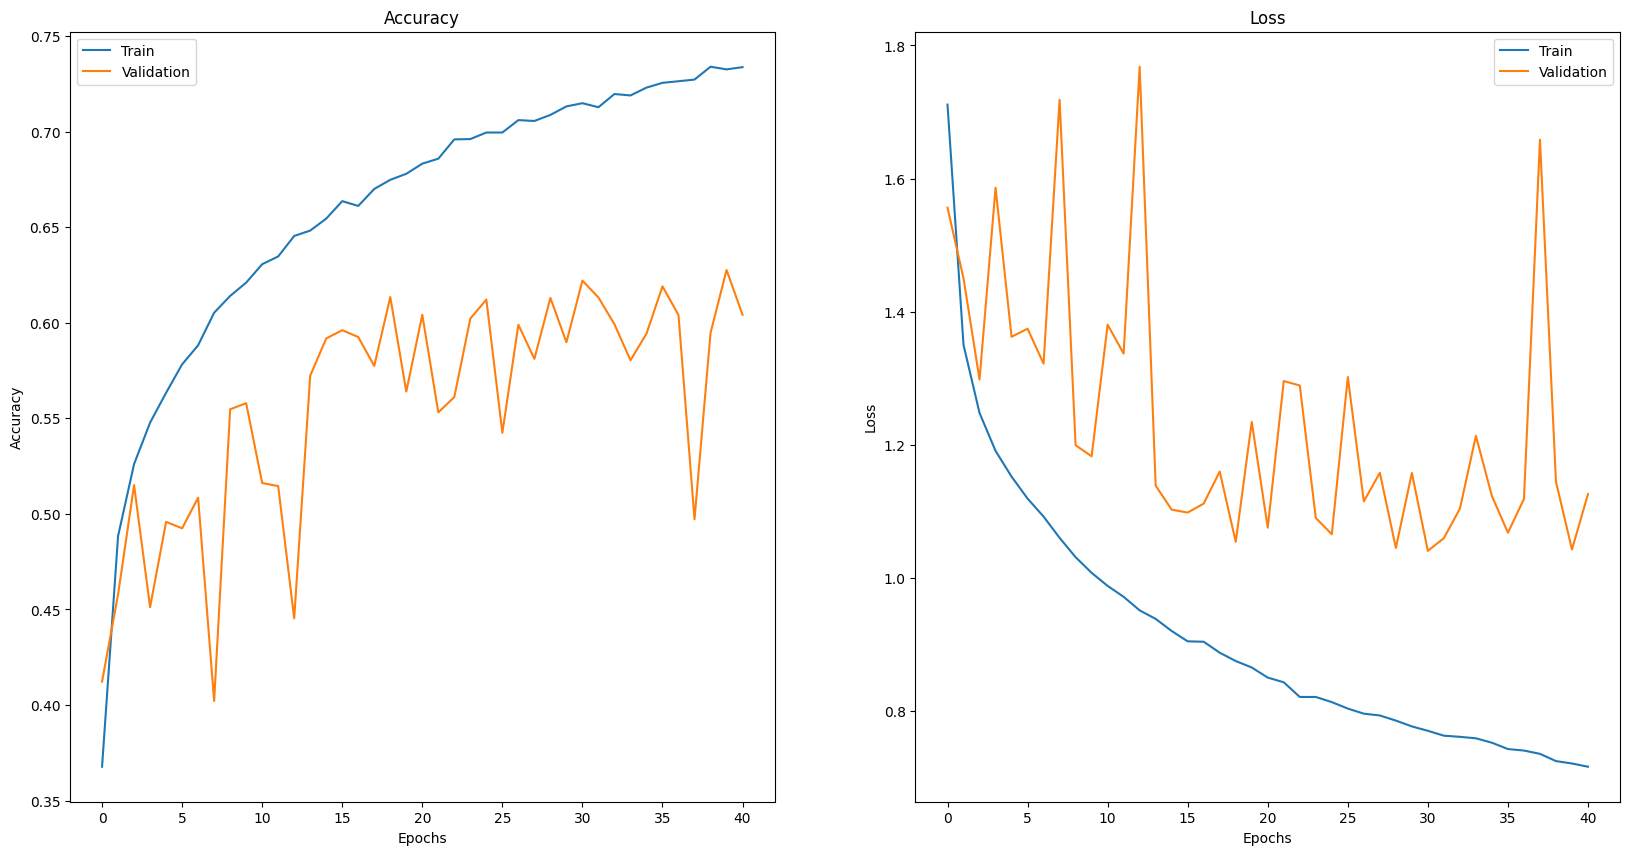

In [ ]:
plot_history(loaded_history_dict)

In [ ]:
from sklearn.metrics import confusion_matrix
def draw_confusion_matrix(y_test_combined,y_pred, class_labels):
  plt.figure(figsize=(4, 4))
  class_labels = class_labels
  sns.heatmap(confusion_matrix(y_test_combined, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_labels, yticklabels=class_labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

Now let's see the confution matrix:

321/321 [==============================] - 4s 12ms/step


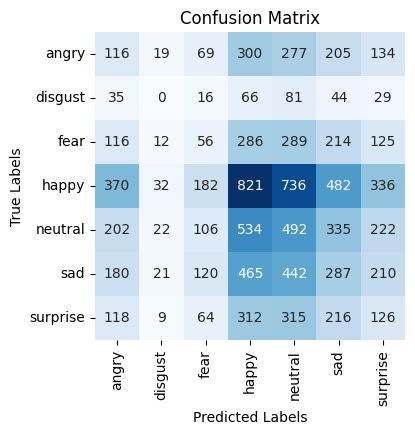

In [ ]:
classes = test_data_generator.classes
predicted_classes = np.argmax(loaded_model.predict(test_data_generator), axis=1)
class_labels = list(test_data_generator.class_indices.keys())
draw_confusion_matrix(classes, predicted_classes, class_labels)

The model performed better than the previous ones, effectively classifying instances from the 'Happy' and 'Neutral' classes. However, the validation accuracy and validation loss scores were quite volatile, which could be attributed to factors such as a small validation set or a high learning rate.

A higher score on the validation set compared to the training set suggests that the model may have overfitted.

Let’s try a different model.

#Fifth Model- RESNET50V2


Now I will use one of the most classic CNN models, ResNet50, and benefit from applying transfer learning techniques.
Leveraging transfer learning technique involves using the weights of a model trained on one dataset for another dataset. Training models from scratch on each dataset can be highly inefficient. Instead, by applying knowledge gained from a similar task to the new data, the training process can be significantly more efficiant.
I will use the weights from ImageNet, a large-scale dataset containing over 14 million images classified into more than 20,000 categories, to leverage a pre-trained model for the classification task.




In [8]:
import matplotlib
from tensorflow.keras.applications import VGG16, ResNet50V2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, CSVLogger
from tensorflow.keras.models import load_model

I will use 'ImageDataGenerator' to rescale the data and split the training dataset into training and validation sets as done previously. Since ResNet50V2 expects images of size 224x224, I will set the target size to these dimensions.

The model utilizes the ResNet50V2 base with `include_top=False` to exclude the original fully connected layers.
I'll add a GlobalAveragePooling2D layer to reduce the feature map dimensions. Next, a Dense layer with 1024 units and ReLU activation that will capture complex features.
The final Dense layer, with 7 neurons (corresponding to the number of classes) and a softmax activation function, which converts the outputs into probabilities. The class with the highest probability will be the model's prediction

In [9]:
NUM_CLASSES = 7
IMAGE_WIDTH, IMAGE_HEIGHT = 224, 224
BATCH_SIZE = 32

In [8]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_dir = '/content/combined-datasets/train'
test_dir = '/content/combined-datasets/test'
training_data_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size= BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    subset='training')


Found 32253 images belonging to 7 classes.


In [9]:
validation_data_generator  = data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation')

Found 8059 images belonging to 7 classes.


In [10]:
test_data_generator  = data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical')


Found 10246 images belonging to 7 classes.


In [ ]:
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))

modified_model = base_model.output
modified_model = GlobalAveragePooling2D()(modified_model)
modified_model = Dense(1024, activation='relu')(modified_model)
modified_model = Dense(NUM_CLASSES, activation='softmax')(modified_model)

model = Model(inputs=base_model.input, outputs=modified_model)
model.trainable = True
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    monitor='accuracy',
    patience=3,
    verbose=1,
    mode='max',
    baseline=1.0,
    restore_best_weights=True
)



Now, let's fit the model.

In [ ]:
history = model.fit(
    training_data_generator,
    steps_per_epoch=training_data_generator.samples // BATCH_SIZE,
    validation_data=validation_data_generator,
    validation_steps=validation_data_generator.samples // BATCH_SIZE,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
1007/1007 [==============================] - 89s 66ms/step - loss: 1.3105 - accuracy: 0.4914 - val_loss: 1.5967 - val_accuracy: 0.4221
Epoch 2/20
1007/1007 [==============================] - 65s 64ms/step - loss: 1.0118 - accuracy: 0.6161 - val_loss: 1.4724 - val_accuracy: 0.4636
Epoch 3/20
1007/1007 [==============================] - 64s 64ms/step - loss: 0.8784 - accuracy: 0.6676 - val_loss: 1.1960 - val_accuracy: 0.5548
Epoch 4/20
1007/1007 [==============================] - 63s 63ms/step - loss: 0.7824 - accuracy: 0.7054 - val_loss: 1.0367 - val_accuracy: 0.6127
Epoch 5/20
1007/1007 [==============================] - 64s 64ms/step - loss: 0.6927 - accuracy: 0.7400 - val_loss: 1.0569 - val_accuracy: 0.6087
Epoch 6/20
1007/1007 [==============================] - 63s 63ms/step - loss: 0.5976 - accuracy: 0.7766 - val_loss: 1.2393 - val_accuracy: 0.5691
Epoch 7/20
1007/1007 [==============================] - 65s 65ms/step - loss: 0.4894 - accuracy: 0.8206 - val_loss: 1.1855 -

We can see that it restored the best weights from the 19th epoch. Now let's examine the performance of the model. However, since this model took a lot of time to train, I'm saving it to Google Drive to ensure it isn't erased by mistake or due to runtime ending.

In [ ]:
# from google.colab import drive
# import json

# drive.mount('/content/drive')
# history_dict = history.history
# history_path = '/content/drive/My Drive/training_history.json'
# with open(history_path, 'w') as f:
#     json.dump(history_dict, f)

# model_path = '/content/drive/My Drive/resnet50_modified_model.h5'
# model.save(model_path)


We will load the model from Google Drive to analyze its performance

In [1]:
from tensorflow.keras.models import load_model
import json
model_path = '/content/drive/My Drive/resnet50_modified_model.h5'
loaded_model = load_model(model_path)

# Load the training history
history_path =  '/content/drive/My Drive/training_history.json'
with open(history_path, 'r') as f:
    loaded_history_dict = json.load(f)

Let's test the accuracy of the model:

In [ ]:
test_loss, test_accu = loaded_model.evaluate(test_data_generator)
print("final test accuracy = {:.2f}".format(test_accu*100))

321/321 [==============================] - 12s 34ms/step - loss: 2.1038 - accuracy: 0.6422
final test accuracy = 64.22


Okay, that looks similar in performance to the CNN model we saw before. Now, we will review the classification report for a more in-depth analysis.

In [13]:
y_pred = loaded_model.predict(test_data_generator, steps=len(test_data_generator))
predict_class = np.argmax(y_pred, axis=1)
y_true = test_data_generator.classes

321/321 [==============================] - 11s 33ms/step


In [16]:
report = classification_report(y_true, predict_class, target_names=test_data_generator.class_indices.keys())
print(report)

              precision    recall  f1-score   support

       angry       0.51      0.52      0.51      1120
     disgust       0.06      0.01      0.02       271
        fear       0.49      0.35      0.41      1098
       happy       0.88      0.80      0.84      2959
     neutral       0.57      0.67      0.62      1913
         sad       0.51      0.59      0.55      1725
    surprise       0.70      0.80      0.75      1160

    accuracy                           0.64     10246
   macro avg       0.53      0.54      0.53     10246
weighted avg       0.64      0.64      0.64     10246



Compared to the previous CNN model, this one performs worse in the disgust class, with a nearly 4% drop in precision and an incredibly low recall, indicating that the model misses about 99% of instances of this emotion. The model does classify more instances of fear and has improved recall by 7%. Happy and surprise show high precision as well. Overall, the performance for the remaining emotions remains average.

As we did before, we will identify cases where the model was confident but wrong to find anomalies.

In [17]:
confident_wrong_indices = np.where((predict_class != y_true) & (np.max(y_pred, axis=1) > 0.75))[0]

In [18]:
wrong_and_confident_classification = {}
for ind in confident_wrong_indices:
  if  predict_class[ind] in wrong_and_confident_classification.keys():
    wrong_and_confident_classification[predict_class[ind]]+=1
  else :
    wrong_and_confident_classification[predict_class[ind]]=0


Let's print to see the results:


In [19]:
sum_of_confident_decisions = 0
for ind, value in wrong_and_confident_classification.items():
  number_to_emotion = next(key for key, value in test_data_generator.class_indices.items() if value == ind)
  print(f'{number_to_emotion} number of cases: {value}')
  sum_of_confident_decisions+=value

print(f'\nThe number of all confident misclassification is :{sum_of_confident_decisions}')

sad number of cases: 735
fear number of cases: 224
neutral number of cases: 698
surprise number of cases: 280
happy number of cases: 211
disgust number of cases: 23
angry number of cases: 399

The number of all confident misclassification is :2570


The number of confident misclassifications has increased fivefold compared to the last model, reaching 2,570 cases. This indicates a significant rise in instances where the model is not only incorrect but also highly confident in its wrong predictions
this number is 25% precents of the total predictions.
The increase in confident misclassifications suggests the model may be overconfident, leading to significant errors. This can be due to overfitting   This could happen because the model has effectively "learned" from the training set in such a way that it trusts its predictions very strongly, even if they are incorrect or not representative of new data

**Sad** has the highest number of confident misclassifications (735), followed by **Neutral** (698) and **Angry** (399). This suggests that the model struggles most with these classes, possibly due to overlapping features or subtle distinctions.

Here we can also see that **Disgust** has the fewest confident misclassifications (23). This observation aligns with the low precision and recall for this class

Now, I will visualize the history and the confusion matrix for better insights.

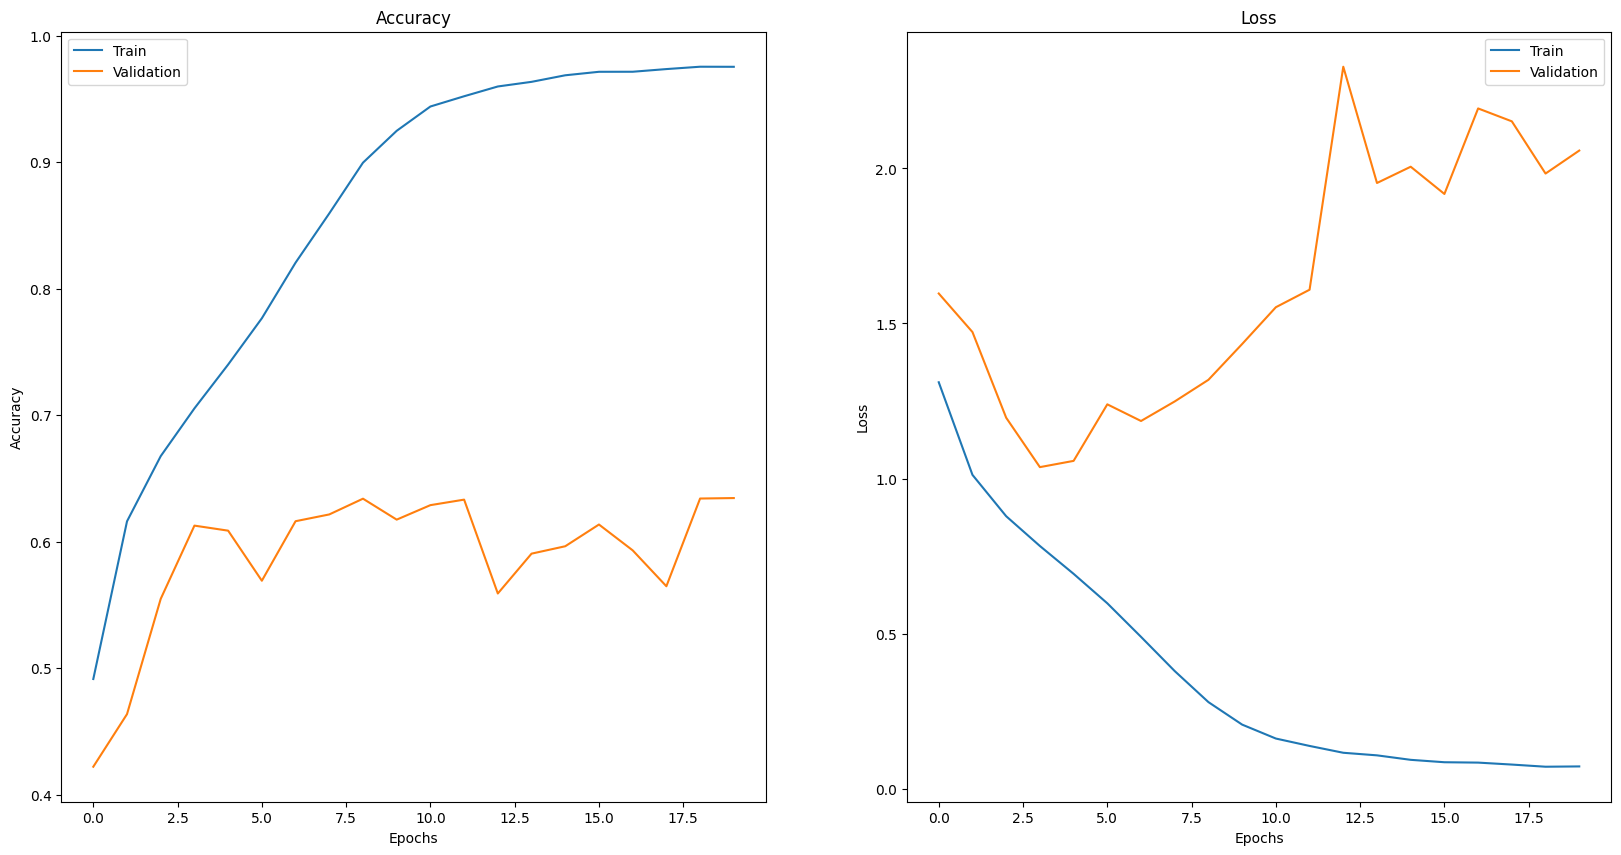

In [ ]:
plot_history(loaded_history_dict)

I can see that since the third epoch, the accuracy of the model on the training set has been increasing steadily, while the accuracy on the validation set varies but more stable than the last nodel. As the loss decreases on the training set but increases on the validation set, this might indicate that the model is overfitting.
Let's examin the confusion matrix of the performance of the model.

321/321 [==============================] - 12s 33ms/step


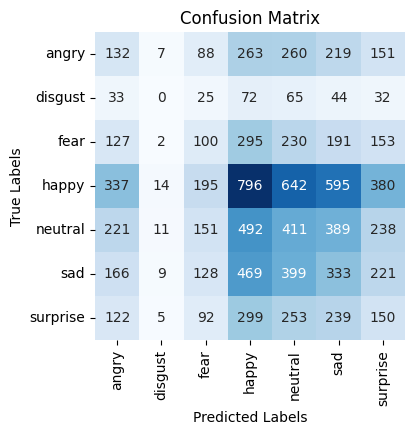

In [ ]:
classes = test_data_generator.classes
predicted_classes = np.argmax(loaded_model.predict(test_data_generator, steps=np.ceil(test_data_generator.samples/test_data_generator.batch_size)), axis=1)
class_labels = list(test_data_generator.class_indices.keys())
cm = draw_confusion_matrix(classes, predicted_classes, class_labels)

We can see that the model performed well at predicting the 'happy' class, as indicated by the diagonal cell for this class being dark blue. The performance on the 'neutral' and 'sad' classes also appears relatively good. However, the model's performance on the other classes is not very impressive.

Let's try to improve our last model by adding a preprocessing stage to enhance image resolution before feeding them into the model. Additionally, we will add two dropout layers to the modified architecture in an attempt to reduce overfitting.

#Sixth Model-Super Resolution + RESNET50V2

An [article](https://ieeexplore.ieee.org/document/9631205?denied=) I read on advancements in Facial Emotion Recognition (FER) suggests using a preprocessing technique called Super-Resolution to improve model accuracy.

According to this article, the purpose of the super-resolution technique is to convert a low-resolution image into a high-resolution image, enhancing visual quality and detail beyond the original coarse features.

It's important to note that, in our mission, capturing small details in the faces within the images is crucial for identifying important features for classification, such as wrinkles and other fine facial expressions.


I thought it would be interesting to investigate the effect of combining super-resolution with the ResNet50v2 model we saw before to see whether it improves performance.

I read about a super-resolution techniques that uses deep convolutional neural networks to recover high-resolution (HR) images from low-resolution (LR) ones. One such technique is called ESRGAN (Enhanced SRGAN),This technique is capable of generating realistic textures during single image super-resolution.
I plan to use ESRGAN for this purpose.


I took the [code](https://www.tensorflow.org/hub/tutorials/image_enhancing?hl=he) from the TensorFlow explanations that use ESRGAN and modified it to suit my needs.


In [1]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [2]:
def preprocess_image(image):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  if image.shape[-1] == 4:
    image = image[...,:-1]

  if image.shape[-1] == 1:
    image = tf.image.grayscale_to_rgb(image)

  hr_image = tf.cast(image, tf.float32)
  return tf.expand_dims(hr_image, 0)

In [ ]:
%matplotlib inline
def plot_image(image_1,image_2):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image_1 = tf.squeeze(image_1)
  image_2 = tf.squeeze(image_2)
  image_1 = np.asarray(image_1)
  image_2 = np.asarray(image_2)
  image_1 = tf.clip_by_value(image_1, 0, 255)
  image_2 = tf.clip_by_value(image_2, 0, 255)
  image_1 = Image.fromarray(tf.cast(image_1, tf.uint8).numpy())
  image_2 = Image.fromarray(tf.cast(image_2, tf.uint8).numpy())


  plt.figure(figsize=(6,6))

  plt.subplot(1, 2, 1)
  plt.imshow(image_1)
  plt.title('Original image')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(image_2)
  plt.title('High resolution image')
  plt.axis('off')

In [3]:
# Declaring Constants
IMAGE_PATH = "/content/FER2013/train/neutral/Training_10059941.jpg"
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [5]:
model_super_res = hub.load(SAVED_MODEL_PATH)

Before applying this preprocessing technique to all images, I want to visualize its effect. To do this, I have randomly selected an image to apply the technique and observe the results.

In [ ]:
hr_image = tf.image.decode_image(tf.io.read_file(IMAGE_PATH))
hr_image = preprocess_image(hr_image)

In [ ]:
fake_image = model_super_res(hr_image)
fake_image = tf.squeeze(fake_image)

In [4]:
def high_resolution(image):
    hr_image = preprocess_image(image)
    processed_image = model_super_res(hr_image)
    processed_image = tf.image.resize(processed_image, size=(224, 224))
    return processed_image



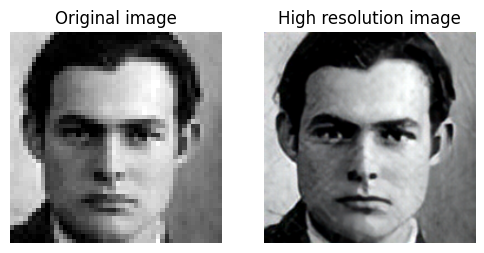

In [ ]:
img = tf.image.decode_image(tf.io.read_file(IMAGE_PATH))
plot_image(hr_image, high_resolution(img))

Looks good! Now let's build a model similar to the previous one, with two key differences: we will add dropout layers to the modified top of the network to address overfitting and apply high-resolution preprocessing.

In [ ]:
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))

# Adding custom layers on top of the base model
modified_model = base_model.output
modified_model = GlobalAveragePooling2D()(modified_model)
modified_model = Dropout(0.25)(modified_model)  # Add Dropout layer
modified_model = Dense(1024, activation='relu')(modified_model)
modified_model = Dropout(0.1)(modified_model)  # Add another Dropout layer
modified_model = Dense(NUM_CLASSES, activation='softmax')(modified_model)


improved_model = Model(inputs=base_model.input, outputs=modified_model)
improved_model.trainable = True
improved_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94668760/94668760 [==============================] - 1s 0us/step


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2, preprocessing_function=high_resolution)
train_dir = '/content/combined-datasets/train'
test_dir = '/content/combined-datasets/test'


In [10]:
training_data_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size= BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    subset='training')


Found 32260 images belonging to 7 classes.


In [11]:
validation_data_generator  = data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation')

Found 8061 images belonging to 7 classes.


In [12]:
test_data_generator  = data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical')

Found 10246 images belonging to 7 classes.


Now, Let's fit the model

In [ ]:
history = improved_model.fit(
    training_data_generator,
    steps_per_epoch=training_data_generator.samples // BATCH_SIZE,
    validation_data=validation_data_generator,
    validation_steps=validation_data_generator.samples // BATCH_SIZE,
    epochs=20,
    callbacks=[early_stopping])

Epoch 1/20
1008/1008 [==============================] - 1440s 1s/step - loss: 1.3477 - accuracy: 0.4852 - val_loss: 2.8412 - val_accuracy: 0.2423
Epoch 2/20
1008/1008 [==============================] - 1403s 1s/step - loss: 1.0386 - accuracy: 0.6058 - val_loss: 1.2201 - val_accuracy: 0.5351
Epoch 3/20
1008/1008 [==============================] - 1401s 1s/step - loss: 0.9135 - accuracy: 0.6541 - val_loss: 1.2336 - val_accuracy: 0.5552
Epoch 4/20
1008/1008 [==============================] - 1400s 1s/step - loss: 0.8212 - accuracy: 0.6899 - val_loss: 1.1790 - val_accuracy: 0.5808
Epoch 5/20
1008/1008 [==============================] - 1401s 1s/step - loss: 0.7297 - accuracy: 0.7263 - val_loss: 1.0560 - val_accuracy: 0.6078
Epoch 6/20
1008/1008 [==============================] - 1400s 1s/step - loss: 0.6462 - accuracy: 0.7566 - val_loss: 1.1589 - val_accuracy: 0.5879
Epoch 7/20
1008/1008 [==============================] - 1337s 1s/step - loss: 0.5443 - accuracy: 0.7974 - val_loss: 1.7517 -

In [ ]:

# from google.colab import drive
# import json

# drive.mount('/content/drive')
# history_dict = history.history
# history_path = '/content/drive/My Drive/training_history_improved_model.json'
# with open(history_path, 'w') as f:
#     json.dump(history_dict, f)

# model_path = '/content/drive/My Drive/resnet50_modified_and_improved_model.h5'
# improved_model.save(model_path)

In [13]:
# Load the model
from tensorflow.keras.models import load_model
import json
model_path = '/content/drive/My Drive/resnet50_modified_and_improved_model.h5'
loaded_model = load_model(model_path)

# Load the training history
history_path = '/content/drive/My Drive/training_history_improved_model.json'
with open(history_path, 'r') as f:
    loaded_history_dict = json.load(f)

After saving this long-training model to Google Drive, let’s observe and analyze its performance.

In [36]:
test_loss, test_accu = loaded_model.evaluate(test_data_generator)
print("final test accuracy = {:.2f}".format(test_accu*100))

321/321 [==============================] - 348s 1s/step - loss: 2.3697 - accuracy: 0.6244
final test accuracy = 62.44


We can see that the accuracy is even lower than before, despite our efforts to improve it. While this is a bit disappointing, we will understand the possible reasons for this outcome right after we will continue investigate the model for gaining better insights.

In [14]:
y_pred = loaded_model.predict(test_data_generator, steps=len(test_data_generator))
predict_class = np.argmax(y_pred, axis=1)
y_true = test_data_generator.classes

321/321 [==============================] - 340s 1s/step


In [38]:
report = classification_report(y_true, predict_class, target_names=test_data_generator.class_indices.keys())
print(report)

              precision    recall  f1-score   support

       angry       0.43      0.60      0.50      1120
     disgust       0.09      0.04      0.06       271
        fear       0.48      0.35      0.41      1098
       happy       0.88      0.80      0.84      2959
     neutral       0.69      0.49      0.57      1913
         sad       0.45      0.70      0.55      1725
    surprise       0.83      0.69      0.75      1160

    accuracy                           0.62     10246
   macro avg       0.55      0.53      0.53     10246
weighted avg       0.65      0.62      0.63     10246



Compared to the previous Resnet50v2 model,
Both models perform poorly on the disgust class, but the new model shows a slight improvement in precision and recall. This class remains a challenging The new model shows improved precision but decreased recall for the surprise and neutral classes, suggesting better accuracy but it is not detecting all the instances of the surprise emotion.

`happy` is still the most string classified class and beside that all the rest are pretty avarage.

The model's increased precision in some classes, but decreased recall in others, indicates that while predictions for certain classes have become more accurate, the model is missing more instances in other classes. This trade-off likely contributes to the overall decline in accuracy

As we did before, we will identify cases where the model was confident but wrong to find anomalies.

In [39]:
confident_wrong_indices = np.where((predict_class != y_true) & (np.max(y_pred, axis=1) > 0.75))[0]

In [40]:
wrong_and_confident_classification = {}
for ind in confident_wrong_indices:
  if  predict_class[ind] in wrong_and_confident_classification.keys():
    wrong_and_confident_classification[predict_class[ind]]+=1
  else :
    wrong_and_confident_classification[predict_class[ind]]=0


Let's print to see the results:


In [41]:
sum_of_confident_decisions = 0
for ind, value in wrong_and_confident_classification.items():
  number_to_emotion = next(key for key, value in test_data_generator.class_indices.items() if value == ind)
  print(f'{number_to_emotion} number of cases: {value}')
  sum_of_confident_decisions+=value

print(f'\nThe number of all confident misclassification is :{sum_of_confident_decisions}')

sad number of cases: 1167
neutral number of cases: 313
disgust number of cases: 88
fear number of cases: 266
surprise number of cases: 118
happy number of cases: 236
angry number of cases: 647

The number of all confident misclassification is :2835


We can see that the model is now even more confident in its predictions, particularly for the 'sad' class, where 1,167 images were classified as 'sad' despite belonging to other classes (represents nearly 10% of the dataset). Despite this high confidence, the decreased precision for the 'sad' class indicates that the model struggles to accurately identify this emotion, reflecting its poor performance in generalizing for this class.

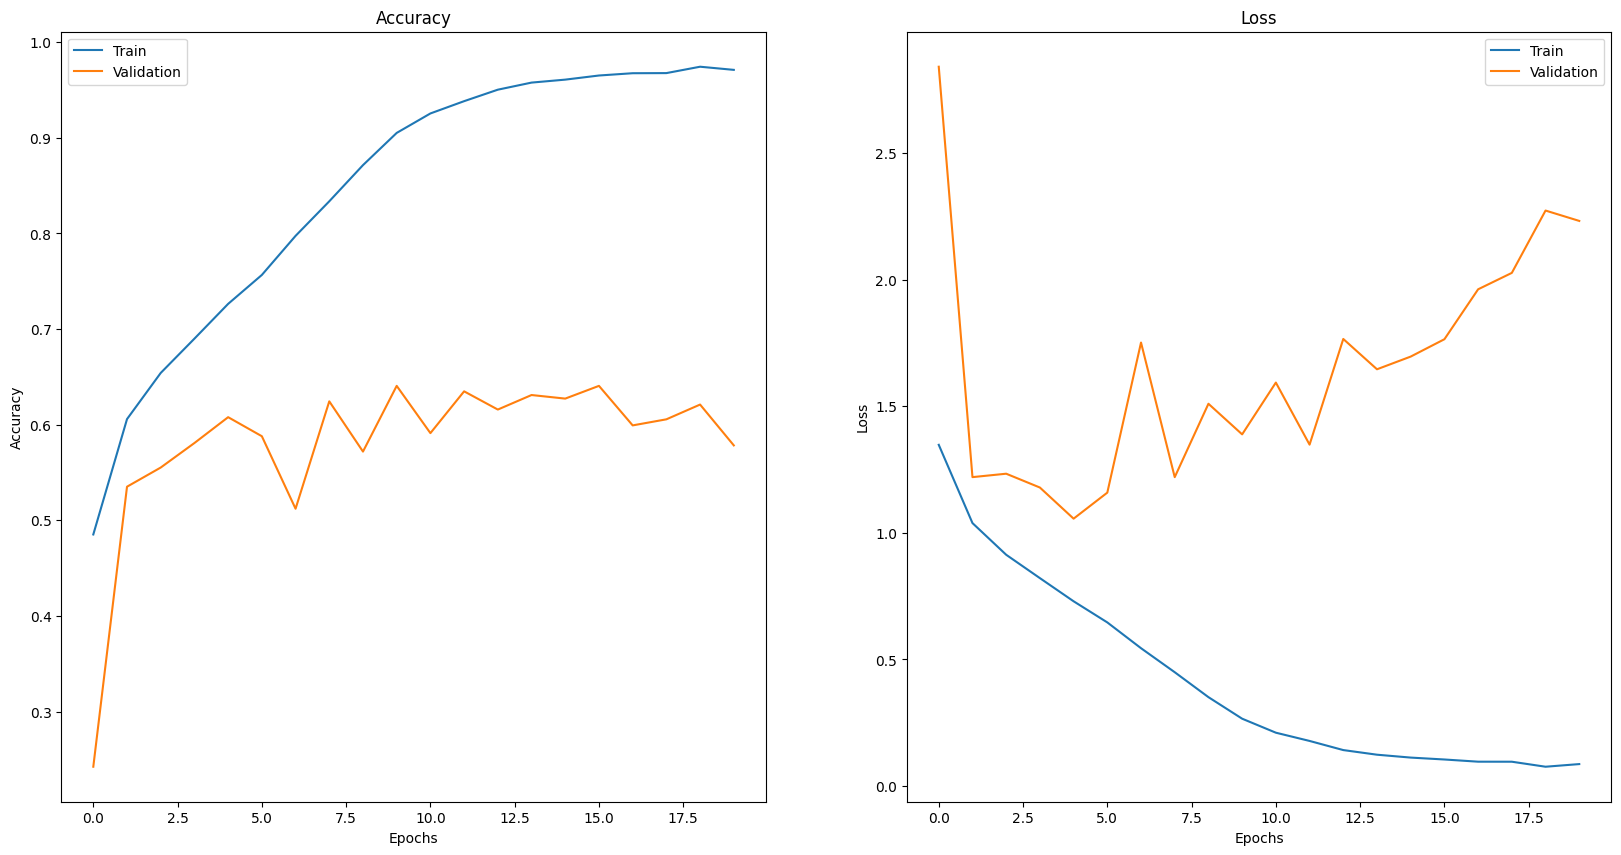

In [ ]:
plot_history(loaded_history_dict)

321/321 [==============================] - 337s 1s/step


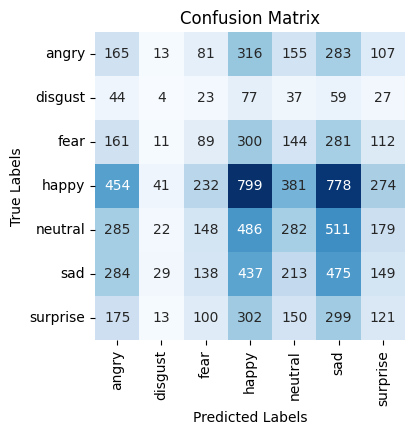

In [ ]:
classes = test_data_generator.classes
predicted_classes = np.argmax(loaded_model.predict(test_data_generator, steps=np.ceil(test_data_generator.samples/test_data_generator.batch_size)), axis=1)
class_labels = list(test_data_generator.class_indices.keys())
cm = draw_confusion_matrix(classes, predicted_classes, class_labels)

The model showed improved performance on the 'sad' class compared to the forth model. However, the overall accuracy decreased, and the training behavior on the validation set appeared quite unstable throughout the epochs.

After training this model, I realized that I cannot entirely attribute its lower performance to the preprocessing stage of super resolution. Since I also added dropout layers and made some changes to the model Architecture.

I retrained it without the dropout layers to ensure that the only difference between this model and the fourth one was the application of super resolution.


In [ ]:
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))

modified_model = base_model.output
modified_model = GlobalAveragePooling2D()(modified_model)
modified_model = Dense(1024, activation='relu')(modified_model)
modified_model = Dense(NUM_CLASSES, activation='softmax')(modified_model)

model = Model(inputs=base_model.input, outputs=modified_model)
model.trainable = True
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    training_data_generator,
    steps_per_epoch=training_data_generator.samples // BATCH_SIZE,
    validation_data=validation_data_generator,
    validation_steps=validation_data_generator.samples // BATCH_SIZE,
    epochs=20,
    callbacks=[early_stopping])

Epoch 1/20
1008/1008 [==============================] - 1414s 1s/step - loss: 1.4846 - accuracy: 0.4163 - val_loss: 2.0060 - val_accuracy: 0.3497
Epoch 2/20
1008/1008 [==============================] - 1381s 1s/step - loss: 1.1108 - accuracy: 0.5773 - val_loss: 1.5672 - val_accuracy: 0.4770
Epoch 3/20
1008/1008 [==============================] - 1381s 1s/step - loss: 0.9458 - accuracy: 0.6432 - val_loss: 1.4271 - val_accuracy: 0.4880
Epoch 4/20
1008/1008 [==============================] - 1381s 1s/step - loss: 0.8500 - accuracy: 0.6772 - val_loss: 1.0970 - val_accuracy: 0.5929
Epoch 5/20
1008/1008 [==============================] - 1382s 1s/step - loss: 0.7572 - accuracy: 0.7153 - val_loss: 1.4169 - val_accuracy: 0.5243
Epoch 6/20
1008/1008 [==============================] - 1381s 1s/step - loss: 0.6667 - accuracy: 0.7510 - val_loss: 1.0058 - val_accuracy: 0.6281
Epoch 7/20
1008/1008 [==============================] - 1380s 1s/step - loss: 0.5750 - accuracy: 0.7833 - val_loss: 1.3335 -

In [ ]:
test_data_generator  = data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical')

Found 10246 images belonging to 7 classes.


In [36]:
from tensorflow.keras.models import load_model
import json
model_path = '/content/drive/My Drive/resnet50_modified_and_improved_model_v2.h5'
loaded_model = load_model(model_path)

# Load the training history
history_path = '/content/drive/My Drive/training_history_improved_model_v2.json'
with open(history_path, 'r') as f:
    loaded_history_dict = json.load(f)

Let’s examine the accuracy now:

In [ ]:
test_loss, test_accu = loaded_model.evaluate(test_data_generator)
print("final test accuracy = {:.2f}".format(test_accu*100))

321/321 [==============================] - 338s 1s/step - loss: 2.1164 - accuracy: 0.6214
final test accuracy = 62.14


We can now officially conclude that super-resolution had the opposite effect from what I expected and actually caused the accuracy to decrease.

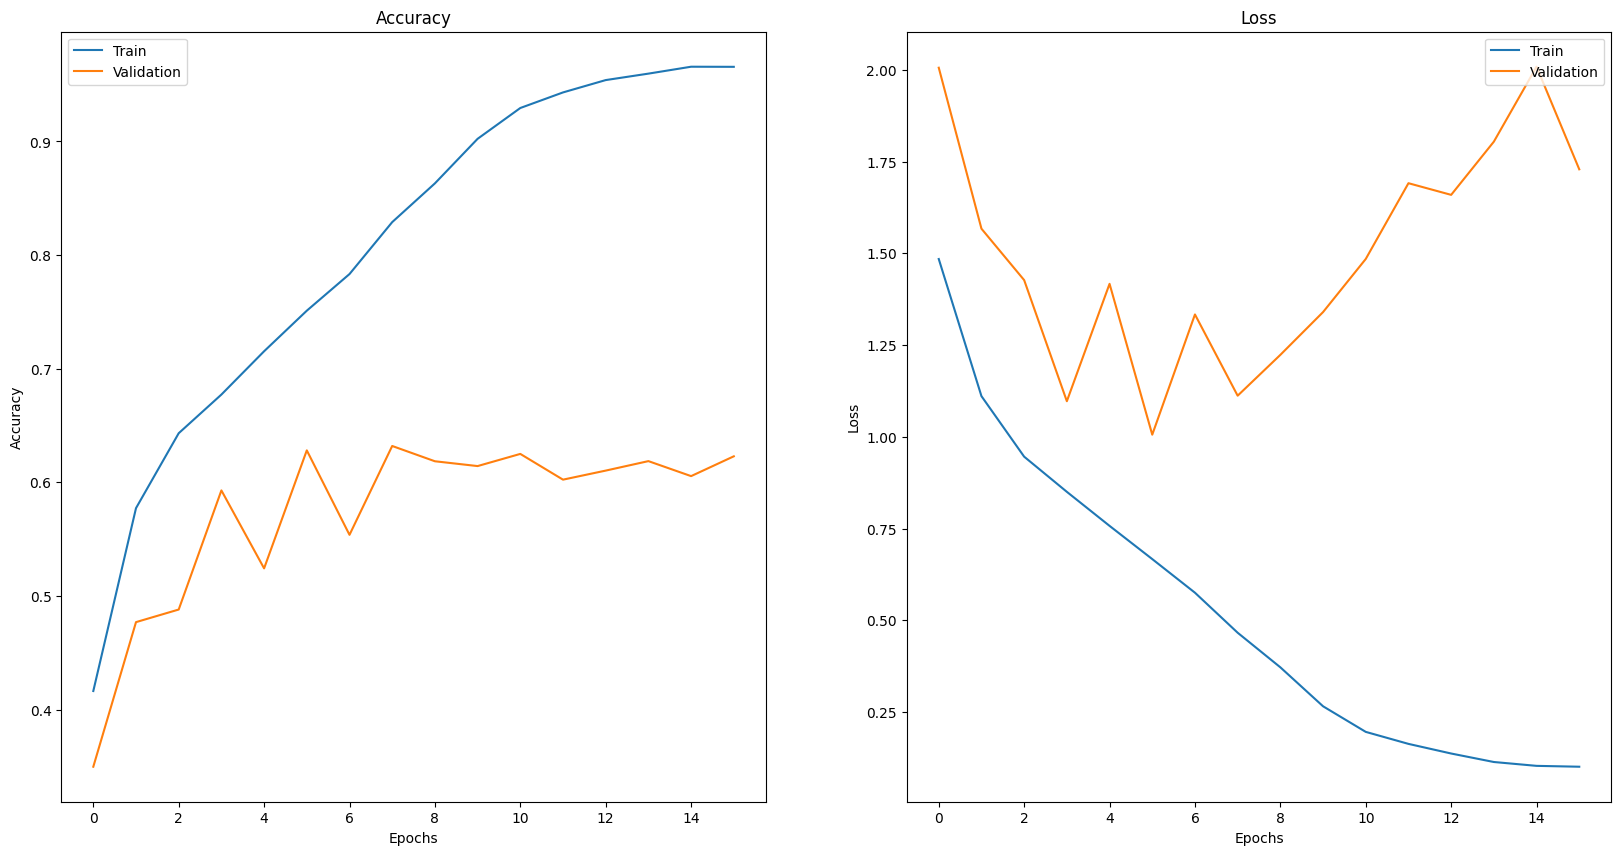

In [ ]:
plot_history(loaded_history_dict)

321/321 [==============================] - 337s 1s/step


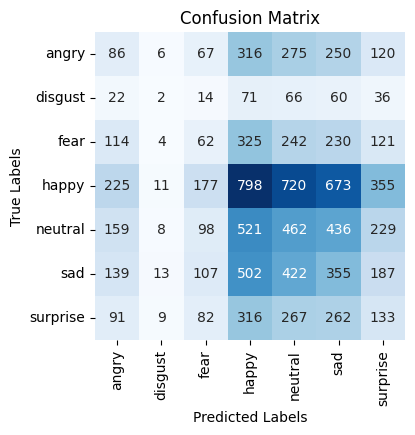

In [ ]:
classes = test_data_generator.classes
predicted_classes = np.argmax(loaded_model.predict(test_data_generator, steps=np.ceil(test_data_generator.samples/test_data_generator.batch_size)), axis=1)
class_labels = list(test_data_generator.class_indices.keys())
cm = draw_confusion_matrix(classes, predicted_classes, class_labels)

Again, we can see that the models perform quite well in predicting the 'happy' class but perform poorly on the 'disgust' class, even though I added augmentations for it. The dropout layers did help somewhat, but they didn’t make a significant difference.

We observed that the model, which includes both dropout layers and a super-resolution technique in the preprocessing stage, performs worse than the model without these 'improvements.'

 Upon investigation, I found that the super-resolution technique can sometimes introduce artificial noise into the images. As a result, the model may start learning these artifacts instead of the actual features relevant to the task, leading to overfitting.
I presume this might be the reason for the lower performance in the 'improved' model.

#CONCLUSIONS


##Results

In [90]:
import pandas as pd

# Create a DataFrame
data = {
    'Model': ['SGDClassifier using HOG features','Decision Tree Classifier','Random Forest Classifier','CNN','ResNet50V2','ResNet50V2 + Super Resolution'],
    'Accuracy': [0.273,0.345, 0.426, 0.644, 0.642, 0.624]
}
df = pd.DataFrame(data)

df.style.format({
    'Accuracy': '{:.3f}'.format
}).set_properties(
    **{'text-align': 'left'},
    subset=['Model', 'Accuracy']
).set_table_styles(
    [{'selector': 'th',
      'props': [('text-align', 'left')]}]
).hide(axis='index')


##Models summary and conclutions
**SGDClassifier** - The model exhibited poor performance, as indicated by the learning curve, which suggests that it did not effectively learn from the data. This may be due to the model being too simple for the given task.

**Decision Tree Classifier** - The model showed very low accuracy and appeared to suffer the most from overfitting. It primarily classified most images as 'happy,' and even after applying class weights and other adjustments, performance did not improve.

**Random Forest Classifier** - Improved upon the previous model but still did not achieve very impressive accuracy, regardless of weight balancing.

**CNN** - I consider it the best model since its accuracy on the test dataset was the highest. To further stabilize its accuracy and validation loss during training, I could explore additional strategies such as implementing learning rate scheduling and employing data augmentation to enhance the diversity of the training data. Additionally, experimenting with different optimizers or adjusting their parameters might help achieve more consistent performance

**Resnet50v2** -This model achieved a similar accuracy on the test dataset compared to the CNN (the third model), so I can consider it a notable achievement as well. since its more complex structure and despite using transfer-learning technique, it took longer to train than the CNN model (third model). However, the comparison is not entirely fair since the CNN model has a much simpler network architecture.

**ResNet50V2 + Super Resolution** - Achieved lower accuracy on the test dataset compared to the previous CNN models, especially in comparison to the fourth model, on which this model is based. Additionally, this model took a significant amount of time to train, approximately 7 hours.

**More improvments ideas**-

1. For the Super-Resolution + ResNet50 model (Fifth model), investigating the effect of applying advanced denoising methods before feeding images into the model could be beneficial.Sunce my primary concern was that the decreased performance when adding the super-resolution preprocessing stage might be due to artifacts introduced by this stage.


2. It seems that most of my models suffered from overfitting. Although I attempted to address this by using dropout layers in the CNN model and applying data augmentation. consider applying data augmentation to the entire dataset or training the modified ResNet models for fewer epochs could be beneficial for that issue, given that it is already a pre-trained model.

##General conclutions
* We can see that the model that performed the best on the combined dataset was the third model, which is the CNN that was built and trained from scratch. Although the ResNet50V2 (forth model) without the improvement achieved very similar performance.

* Most models performed well on the 'happy' class. Despite undersampling it in the last three models, the 'happy' class achieved better results compared to the 'neutral' class, which has the same number of images. This indicates that the models could learn the 'happy' patterns better.

* Although I tried to balance the dataset before feeding it into the CNNs (all the last three models) and avoid overfitting by augmenting the low-appearance class 'Disgust', it seems like most of my models still suffered from overfitting, and most models performed poorly on the low-appearance classes.

* All models failed to perform well on the "disgust" class, regardless of whether data augmentation was applied. This suggests that the issue might be with the data quality or the fundamental difficulty in distinguishing this emotion from others.

* Combining two datasets was not easy, especially when one of them is FER2013, which is currently one of the most complex datasets in the field. Combining datasets can provide a richer and more diverse set of examples, which helps models generalize better and perform well on varied data.
However, it can also lead to imbalance if one dataset is more dominant. The model might become biased toward the features of the larger or higher-quality dataset. This imbalance could contribute to overfitting, as the model may not perform well on new data that is more similar to the less dominant dataset. In our case, this also could have been the reason for overfitting, as our distributions of RGB and grayscale images were not balanced, and the class distribution in the combined dataset was not perfectly balanced, despite my efforts to correct it.

#SELF-REFLECTION
Initially, the task appeared challenging, and it indeed was. Preprocessing the data was more complex than expected, especially given the two datasets with their many differences. Additionally, the training times for the final models were very high and required robust hardware.

I started this project with excitement, expecting it to be interesting. Now, I am even more thrilled after after delving into the field. I’ve seen how even within a narrow domain, there are numerous architectures and ideas, along with a lot of trial and error, to improve and achieve better results.

This experience has made me think, read, and investigate extensively.
It has strengthened my interest in data science and my desire to pursue further studies (M.Sc.) with a focus on this field.





**THANK YOU FOR READING!**
